In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/PREDICTIVE MODELLING/PM Assignment')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## sns.set_palette(sns.color_palette("crest"))

import warnings
warnings.filterwarnings("ignore")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g5rsHSmUvdNW-dWnOjvU5ARK61eT9Iw5QUUbC_Euph2XyphHoKPgLI


In [232]:
pd.options.display.max_rows=None
pd.options.display.max_columns=None

*Q1. Exploratory Data Analysis for Problem 2*


---



---


The very first step of any data analysis assignment is to do the exploratory data analysis (EDA). Once you have understood the nature of all the variables, especially identified the response and the predictors, apply appropriate methods to determine whether there is any ***duplicate observation*** or ***missing data*** and whether the variables have a *symmetric or skewed distribution*.

Note that data may contain various types of attributes and numerical and/or visual data summarization techniques need to be appropriately decided. Both ***univariate and bivariate analyses*** and ***pre-processing of data*** are important. Check for ***outliers and comment*** on removing or keeping them while model building. For this is a classification problem, **the dependence of the response on the predictors** needs to be investigated.

## EDA For Football_Scholarship Data for both Logistic and LDA 

#### Read CSV

In [233]:
df_football=pd.read_csv("Football+Scholarship.csv")

In [234]:
df_football.head(5)

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Type,School_Score,Overall_Score,Region,Scholarship
0,7.0,0.27,0.36,High,D,0.45,8.8,Eastern,Partial
1,6.3,0.30,0.34,Low,C,0.49,9.5,Eastern,Partial
2,8.1,0.28,0.40,Moderate,C,0.44,10.1,Eastern,Partial
3,7.2,0.23,0.32,Moderate,C,0.40,9.9,Eastern,Partial
4,7.2,0.23,0.32,Moderate,C,0.40,9.9,Eastern,Partial


In [235]:
df_football.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6215 entries, 0 to 6214
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Academic_Score       6215 non-null   float64
 1   Score_on_Plays_Made  6215 non-null   float64
 2   Missed_Play_Score    6215 non-null   float64
 3   Injury_Propensity    6215 non-null   object 
 4   School_Type          6215 non-null   object 
 5   School_Score         6215 non-null   float64
 6   Overall_Score        6215 non-null   float64
 7   Region               6215 non-null   object 
 8   Scholarship          6215 non-null   object 
dtypes: float64(5), object(4)
memory usage: 437.1+ KB


We have 9 columns in this dataset. The target / dependent / response variable is Scholarship, which is an object datatype. The other columns are feature / independent / predictor variables. 

Of the 8 predictor variables, 5 (Academic_Score, Score_on_Plays_Made, Missed_Play_Score, School_Score, Overall_Score) are scores of different types and are float datatype. The remaining, 3 (Injury_Propensity, School_Type, Region) are object datatypes, with 2 or more classes. We will analyse the classes during EDA of categorical variables below.

#### Null value identification & treatment

In [236]:
df_football.isnull().sum()

Academic_Score         0
Score_on_Plays_Made    0
Missed_Play_Score      0
Injury_Propensity      0
School_Type            0
School_Score           0
Overall_Score          0
Region                 0
Scholarship            0
dtype: int64

- There is no null values in any variable

#### Duplicate row identification & removal

In [237]:
df_football.duplicated().sum()

947

- There are 947 Duplicate Rows in Data. Below we have pulled some examples

######Matching duplicate rows (for depiction of duplicacy)

In [238]:
df_football[df_football.duplicated(keep='first')].head()

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Type,School_Score,Overall_Score,Region,Scholarship
4,7.2,0.23,0.32,Moderate,C,0.40,9.9,Eastern,Partial
5,8.1,0.28,0.40,Moderate,C,0.44,10.1,Eastern,Partial
7,7.0,0.27,0.36,High,D,0.45,8.8,Eastern,Partial
8,6.3,0.30,0.34,Low,C,0.49,9.5,Eastern,Partial
36,7.3,0.24,0.39,High,D,0.36,8.6,Southern,Partial


In [239]:
df_football[df_football.duplicated(keep='last')].head()

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Type,School_Score,Overall_Score,Region,Scholarship
0,7.0,0.27,0.36,High,D,0.45,8.8,Eastern,Partial
1,6.3,0.30,0.34,Low,C,0.49,9.5,Eastern,Partial
2,8.1,0.28,0.40,Moderate,C,0.44,10.1,Eastern,Partial
3,7.2,0.23,0.32,Moderate,C,0.40,9.9,Eastern,Partial
35,7.3,0.24,0.39,High,D,0.36,8.6,Southern,Partial


- from above Example we can see Row number 3 and 4 are duplicate. In the same way,Row number 1 and 5 and 0 and 7 ect are duplicate

######Removing the duplicate records

In [240]:
df_football=df_football.drop_duplicates()

In [241]:
df_football.isnull().sum()

Academic_Score         0
Score_on_Plays_Made    0
Missed_Play_Score      0
Injury_Propensity      0
School_Type            0
School_Score           0
Overall_Score          0
Region                 0
Scholarship            0
dtype: int64

In [242]:
df_football.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5268 entries, 0 to 6214
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Academic_Score       5268 non-null   float64
 1   Score_on_Plays_Made  5268 non-null   float64
 2   Missed_Play_Score    5268 non-null   float64
 3   Injury_Propensity    5268 non-null   object 
 4   School_Type          5268 non-null   object 
 5   School_Score         5268 non-null   float64
 6   Overall_Score        5268 non-null   float64
 7   Region               5268 non-null   object 
 8   Scholarship          5268 non-null   object 
dtypes: float64(5), object(4)
memory usage: 411.6+ KB


In [243]:
df_football.describe(include = 'all')

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Type,School_Score,Overall_Score,Region,Scholarship
count,5268.000000,5268.000000,5268.000000,5268,5268,5268.000000,5268.000000,5268,5268
unique,NaN,NaN,NaN,4,3,NaN,NaN,3,2
top,NaN,NaN,NaN,Low,C,NaN,NaN,Eastern,Partial
freq,NaN,NaN,NaN,2323,2906,NaN,NaN,2403,3337
mean,7.205363,0.337905,0.320306,NaN,NaN,0.531380,10.502904,NaN,NaN
std,1.299212,0.161308,0.146286,NaN,NaN,0.146938,1.169325,NaN,NaN
min,3.800000,0.080000,0.000000,NaN,NaN,0.220000,8.000000,NaN,NaN
25%,6.400000,0.230000,0.250000,NaN,NaN,0.430000,9.500000,NaN,NaN
50%,6.900000,0.290000,0.310000,NaN,NaN,0.510000,10.300000,NaN,NaN
75%,7.700000,0.400000,0.400000,NaN,NaN,0.600000,11.300000,NaN,NaN


#<span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Univariate & Bivariate Analysis

Univariate analysis refer to the analysis of a single variable. The main purpose of univariate analysis is to summarize and find patterns in the data variable. The key point is that there is only one variable involved in the analysis

####Univariate for Continous Variable

   <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">  First let us check the distribution of the data.


<font color=darkblue>
    
* The plot displayed below is called as a Histogram
    
* The X-axis groups the observations from minimum to maximum along the axis on the basis of the discrete points or class intervals

* The Y-axis measures the frequency of occurance of observations for each discrete point or class interval.

In [244]:
num = ['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score', 'School_Score','Overall_Score']

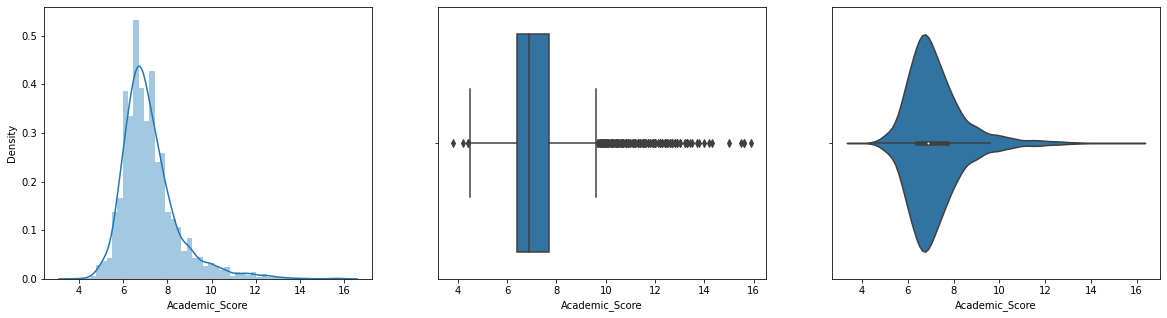

Academic_Score upper wisk point =  9.65
Academic_Score has 280 data points as Outlier on the upper side
Academic_Score lower wisk point =  4.450000000000001
Academic_Score has 4 data points as Outlier on the lower side


In [245]:
# Plots for Academic Score
fig_dims = (20, 5) 
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=fig_dims) 
sns.distplot(df_football.Academic_Score, kde=True, ax=axs[0]) 
sns.boxplot(x= 'Academic_Score', data=df_football, ax=axs[1])
sns.violinplot(df_football.Academic_Score, ax= axs[2]) 
plt.show()

Academic_Score_wisk_high=df_football.Academic_Score.quantile(0.75) + (1.5*(df_football.Academic_Score.quantile(0.75) - df_football.Academic_Score.quantile(0.25)))
print("Academic_Score upper wisk point = ",Academic_Score_wisk_high)
print("Academic_Score has",df_football[df_football['Academic_Score'] > Academic_Score_wisk_high]['Academic_Score'].shape[0],"data points as Outlier on the upper side")

Academic_Score_wisk_low=df_football.Academic_Score.quantile(0.25) - (1.5*(df_football.Academic_Score.quantile(0.75) - df_football.Academic_Score.quantile(0.25)))
print("Academic_Score lower wisk point = ",Academic_Score_wisk_low)
print("Academic_Score has",df_football[df_football['Academic_Score'] < Academic_Score_wisk_low]['Academic_Score'].shape[0],"data points as Outlier on the lower side")

Observation
1. Most of the observations are in between 5 and around 9.5
2. Distribution is Right Skewed 
3. Outliers are more on the higher side

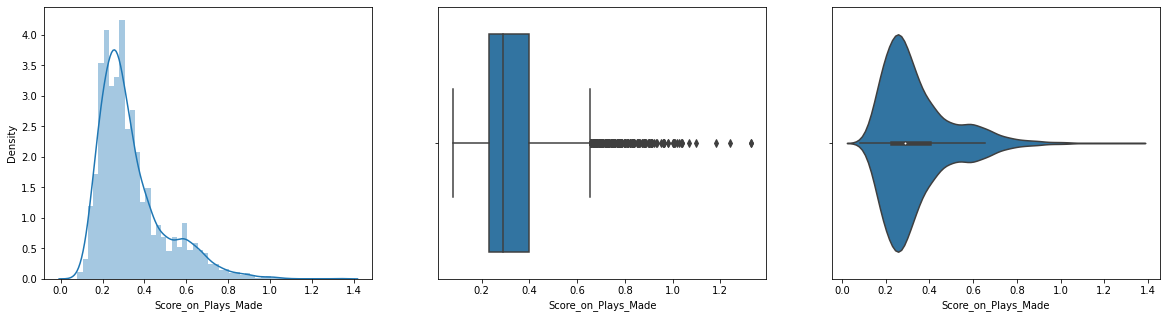

Score_on_Plays upper wisk point =  0.655
Score_on_Plays_Made has 300 data points as Outlier on the upper side
Score_on_Plays lower wisk point =  -0.024999999999999994
Score_on_Plays_Made has 0 data points as Outlier on the Lower side


In [246]:
# Plots for Score on Plays Made
fig_dims = (20, 5) 
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=fig_dims) 
sns.distplot(df_football.Score_on_Plays_Made, kde=True, ax=axs[0]) 
sns.boxplot(x= 'Score_on_Plays_Made', data=df_football, ax=axs[1])
sns.violinplot(df_football.Score_on_Plays_Made, ax= axs[2]) 
plt.show()

Score_on_Plays_wisk_high=df_football.Score_on_Plays_Made.quantile(0.75) + (1.5*(df_football.Score_on_Plays_Made.quantile(0.75) - df_football.Score_on_Plays_Made.quantile(0.25)))
print("Score_on_Plays upper wisk point = ",Score_on_Plays_wisk_high)
print("Score_on_Plays_Made has",df_football[df_football['Score_on_Plays_Made'] > Score_on_Plays_wisk_high]['Score_on_Plays_Made'].shape[0],"data points as Outlier on the upper side")

Score_on_Plays_wisk_low=df_football.Score_on_Plays_Made.quantile(0.25) - (1.5*(df_football.Score_on_Plays_Made.quantile(0.75) - df_football.Score_on_Plays_Made.quantile(0.25)))
print("Score_on_Plays lower wisk point = ",Score_on_Plays_wisk_low)
print("Score_on_Plays_Made has",df_football[df_football['Score_on_Plays_Made'] < Score_on_Plays_wisk_low]['Score_on_Plays_Made'].shape[0],"data points as Outlier on the Lower side")

Observation
1. From the violin plot it can be seen that, most of the observations are in between 0.2 and 0.6
2. Distribution is Right Skewed 
3. Outliers are on the higher side
4. two clusters can be seen.

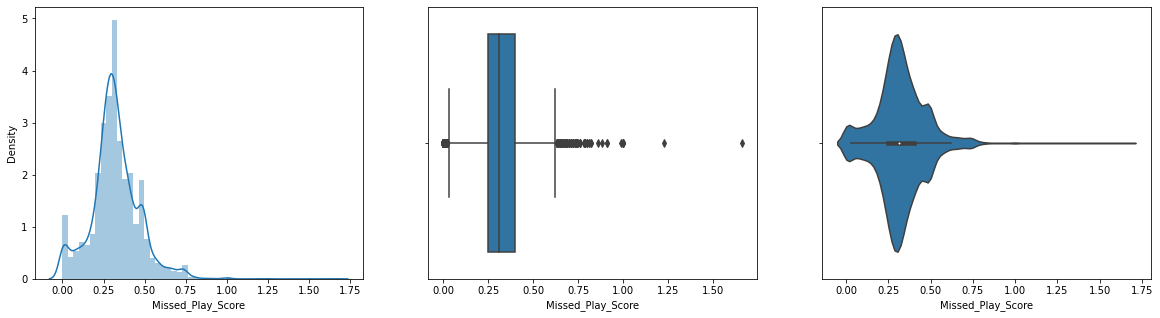

Missed_Play_Score upper wisk point =  0.625
Missed_Play_Score has 171 data points as Outlier on the upper side
Missed_Play_Score lower wisk point =  0.024999999999999967
Missed_Play_Score has 193 data points as Outlier on the lower side


In [247]:
# Plots for Missed Play Score
fig_dims = (20, 5) 
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=fig_dims) 
sns.distplot(df_football.Missed_Play_Score, kde=True, ax=axs[0]) 
sns.boxplot(x= 'Missed_Play_Score', data=df_football, ax=axs[1])
sns.violinplot(df_football.Missed_Play_Score, ax= axs[2]) 
plt.show()

Missed_Play_Score_wisk_high=df_football.Missed_Play_Score.quantile(0.75) + (1.5*(df_football.Missed_Play_Score.quantile(0.75) - df_football.Missed_Play_Score.quantile(0.25)))
print("Missed_Play_Score upper wisk point = ",Missed_Play_Score_wisk_high)
print("Missed_Play_Score has",df_football[df_football['Missed_Play_Score'] > Missed_Play_Score_wisk_high]['Missed_Play_Score'].shape[0],"data points as Outlier on the upper side")


Missed_Play_Score_wisk_low=df_football.Missed_Play_Score.quantile(0.25) - (1.5*(df_football.Missed_Play_Score.quantile(0.75) - df_football.Missed_Play_Score.quantile(0.25)))
print("Missed_Play_Score lower wisk point = ",Missed_Play_Score_wisk_low)
print("Missed_Play_Score has",df_football[df_football['Missed_Play_Score'] < Missed_Play_Score_wisk_low]['Missed_Play_Score'].shape[0],"data points as Outlier on the lower side")


Observation
1. From the violin plot it can be seen that, most of the observations are in between 0.2 and 0.6
2. Distribution is Right Skewed 
3. Outliers are more on the higher side
4. 4 clusters can be seen.

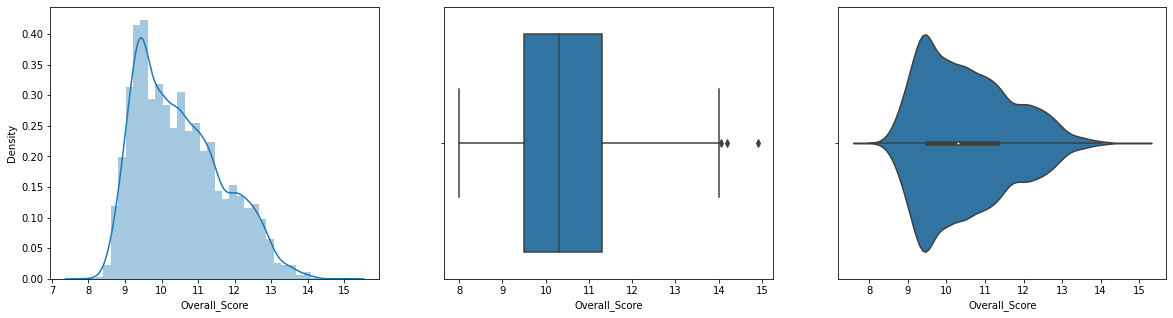

Overall_Score upper wisk point =  14.000000000000002
Overall_Score has 3 data points as Outlier on the upper side
Overall_Score lower wisk point =  6.799999999999999
Overall_Score has 0 data points as Outlier on the Lower side


In [248]:
# Plots for Overall Score
fig_dims = (20, 5) 
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=fig_dims) 
sns.distplot(df_football.Overall_Score, kde=True, ax=axs[0]) 
sns.boxplot(x= 'Overall_Score', data=df_football, ax=axs[1])
sns.violinplot(df_football.Overall_Score, ax= axs[2]) 
plt.show()

Overall_Score_wisk_high=df_football.Overall_Score.quantile(0.75) + (1.5*(df_football.Overall_Score.quantile(0.75) - df_football.Overall_Score.quantile(0.25)))
print("Overall_Score upper wisk point = ", Overall_Score_wisk_high)
print("Overall_Score has",df_football[df_football['Overall_Score'] > Overall_Score_wisk_high]['Overall_Score'].shape[0],"data points as Outlier on the upper side")

Overall_Score_wisk_low=df_football.Overall_Score.quantile(0.25) - (1.5*(df_football.Overall_Score.quantile(0.75) - df_football.Overall_Score.quantile(0.25)))
print("Overall_Score lower wisk point = ", Overall_Score_wisk_low)
print("Overall_Score has",df_football[df_football['Overall_Score'] < Overall_Score_wisk_low]['Overall_Score'].shape[0],"data points as Outlier on the Lower side")


Observation
1. From the violin plot it can be seen that, most of the observations are in between 6 and 14
2. Distribution is Right Skewed 
3. Few outliers that are more on the higher side

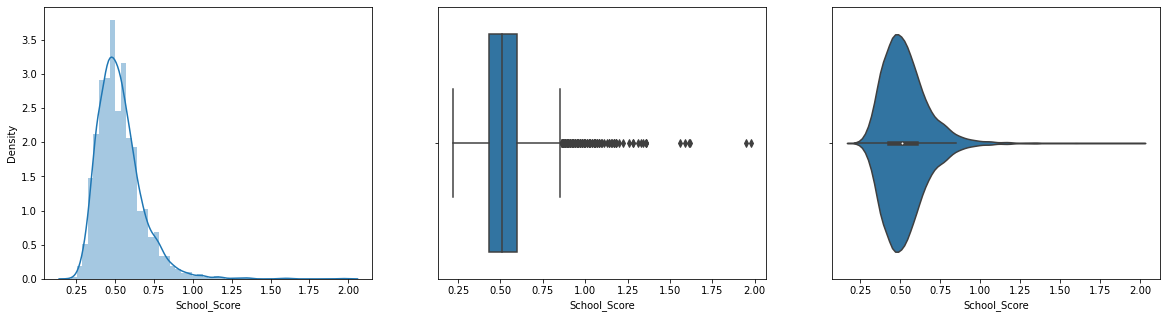

School_Score upper wisk point =  0.855
School_Score has 153 data points as Outlier on the upper side
School_Score lower wisk point =  0.175
School_Score has 0 data points as Outlier on the Lower side


In [249]:
# Plots for School Score
fig_dims = (20, 5) 
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=fig_dims) 
sns.distplot(df_football.School_Score, kde=True, ax=axs[0]) 
sns.boxplot(x= 'School_Score', data=df_football, ax=axs[1])
sns.violinplot(df_football.School_Score, ax= axs[2]) 
plt.show()

School_Score_wisk_high=df_football.School_Score.quantile(0.75) + (1.5*(df_football.School_Score.quantile(0.75) - df_football.School_Score.quantile(0.25)))
print("School_Score upper wisk point = ",School_Score_wisk_high)
print("School_Score has",df_football[df_football['School_Score'] > School_Score_wisk_high]['School_Score'].shape[0],"data points as Outlier on the upper side")

School_Score_wisk_low=df_football.School_Score.quantile(0.25) - (1.5*(df_football.School_Score.quantile(0.75) - df_football.School_Score.quantile(0.25)))
print("School_Score lower wisk point = ",School_Score_wisk_low)
print("School_Score has",df_football[df_football['School_Score'] < School_Score_wisk_low]['School_Score'].shape[0],"data points as Outlier on the Lower side")

Observation
1. From the violin plot it can be seen that, most of the observations are in between 0.2 and 0.75
2. Distribution is Right Skewed 
3. Outliers are more on the higher side
4. No cluster present 

###Univariate Analysis Catgeorical Features

In [250]:
### Define Function for univariate analysis of categorical variable
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df_football[cat_column].value_counts(normalize=False))
    print('\n')
    print(df_football[cat_column].value_counts(normalize=True))
    sns.countplot(x=cat_column, data=df_football, palette='mako')
    plt.show()
    print("       ")

In [251]:
cat = ['Injury_Propensity', 'School_Type', 'Region', 'Scholarship']

Details of Injury_Propensity
----------------------------------------------------------------
Low         2323
Normal      1162
Moderate     893
High         890
Name: Injury_Propensity, dtype: int64


Low         0.440964
Normal      0.220577
Moderate    0.169514
High        0.168945
Name: Injury_Propensity, dtype: float64


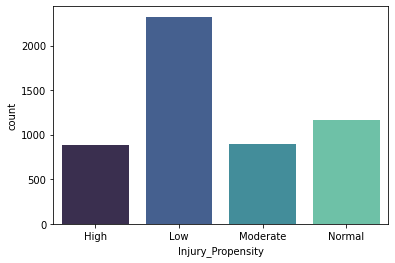

       
Details of School_Type
----------------------------------------------------------------
C    2906
B    1446
D     916
Name: School_Type, dtype: int64


C    0.551632
B    0.274487
D    0.173880
Name: School_Type, dtype: float64


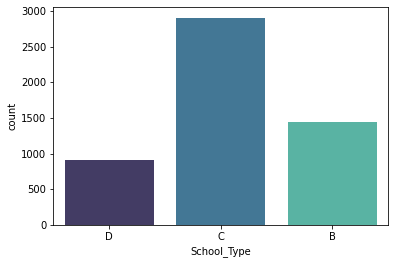

       
Details of Region
----------------------------------------------------------------
Eastern     2403
Western     1457
Southern    1408
Name: Region, dtype: int64


Eastern     0.456150
Western     0.276576
Southern    0.267274
Name: Region, dtype: float64


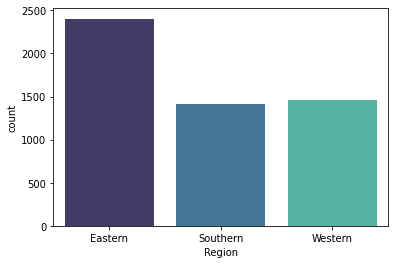

       
Details of Scholarship
----------------------------------------------------------------
Partial    3337
Full       1931
Name: Scholarship, dtype: int64


Partial    0.633447
Full       0.366553
Name: Scholarship, dtype: float64


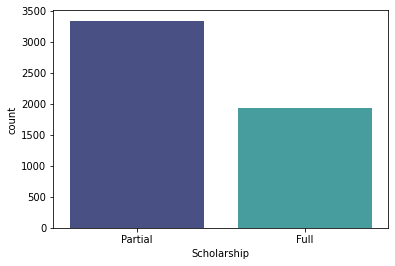

In [252]:
for x in cat:
    univariateAnalysis_category(x)

Observations
1. Injury Propensity constitutes of 44% (2323) Low injury, 22% (1162) Normal and 17% (893) for Moderate and 17% (890) High Injury. It seems logical that most students have low propensity for injury, considering that this is a group of athletes and they would have adequate training over the years.

2. School C consitutes of 55% (2906) of the entire data, however School B contributes 27% (1446) while School D contributes 18% (916) in the dataset.

3.  45% (2403) of the students belongs to Eastern region whearas Southern 27% (1457) and Western 28% (1408).

4. Our TV Scholarship includes 63% (3337) students with Partial Scholarship while 37% (1931) of student enjoys full scholarship.

## Bivariate Analysis

####Numeric & Numeric

In [253]:
num

['Academic_Score',
 'Score_on_Plays_Made',
 'Missed_Play_Score',
 'School_Score',
 'Overall_Score']

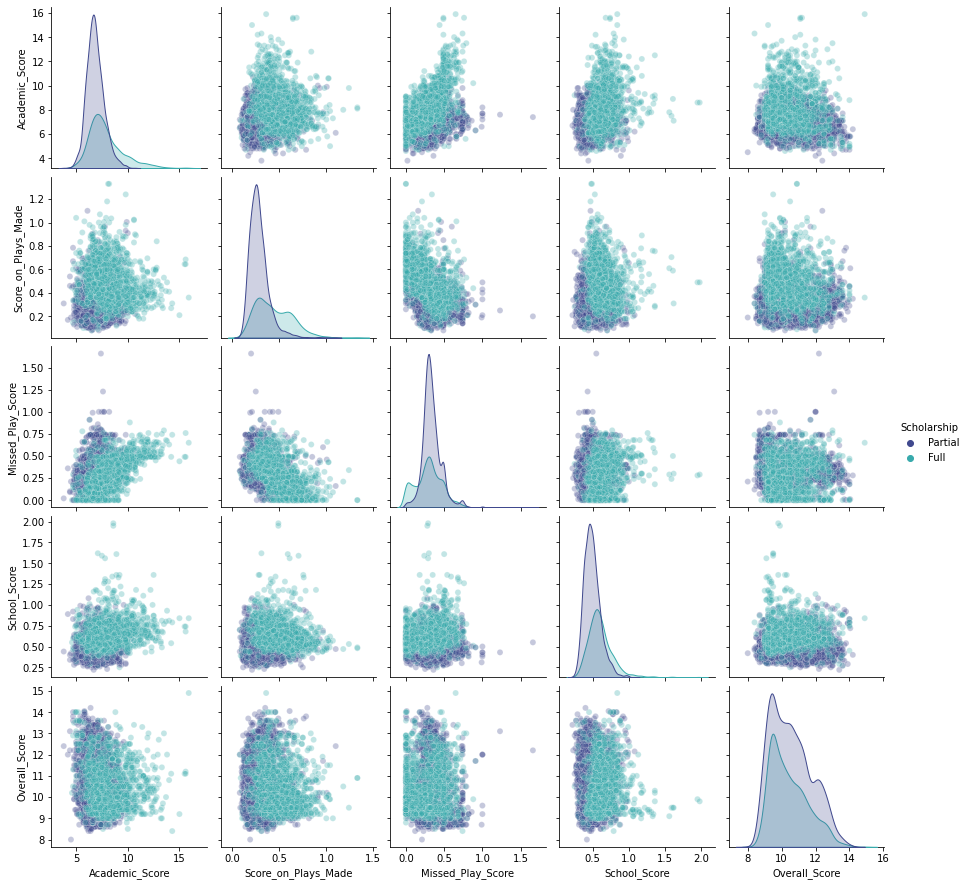

In [254]:
sns.pairplot(vars= df_football[num], data=df_football, hue = 'Scholarship', palette='mako', plot_kws={'alpha':0.3})
plt.show()

Observation from the pairplot
Since there 60-80% overlaps between the two classes in all the independent variable distributions across the two classes (Partial and Full), the best analysis is either inconclusive or how the data 'tends' to behave. With that, the following can be seen:
 1. There isn't much correlation between the independent variables.
 2. The KDE across the diagonal shows that none of the variable offer good separation of the classes, with Overall_Score showing complete overlap.
 **Academic_Score-**

a. Scores_on_Plays_Made: Higher the Academic_Score and higher the Scores_on_Plays_Made, is likely to result in a Full Scholarship, and vice-versa. We do not have enough data to analyse, if any one of the variables is low. 

b. Missed_Play_Score: Overall, data has a lot of overlaps on both the classes, but it looks like full scholarship is more likely a result of lower Missed_Play_Score and higher Academic_Score. That said, higher Academic_Score and higher Missed_Play_Score also has many data points with full Scholarship

c. School_Score: Even if a student has higher Academic_Score, a lower School_Score is more likely to result in a partial Scholarship. The best chance of getting a full scholarship seems to be average to high School_Score and average to high Academic_score. 

d. Overall_Score: Little is known of the method of computation of this composite score. It bears no relationship with other variables (escaping multicollinearity, but need University's help to understand this better). It shows inadequate separation of the classes  

**Scores_on_Plays_Made-**

a. Missed_Play_Score: Full Scolarship can be obtained, irrespective of the  Missed_Play_Score as long as the Scores_on_Plays_Made is average to high.

b. School_Score: For a Full Scholarship, School_Score needs to be average to high with a avergae to high Scores_on_Plays_Made.

c. Overall_Score: Overall_Score and Scores_on_Plays_Made could be high or low for a Full Scholarship. Data is completely scattered and offers no separation of classes for any insight or decision making.


**Missed_Play_Score-**

a. School_Score: A low School_Score will most likely result in a Partial Scholarship

b. Overall_Score: Overall_Score could be high or low, but Missed_Play_Score needs to be high for a Full Scholarship.

**Overall_Score-**

a. Overall_Score: for low values of School_Score only Partial Scholarship is seen.







------------

**1. It can be observed that there is not much correlation among the DV.**
2. The spread is scatterd for most of the data
3. There is a slight positive corr btw Academic Score and Missed Play Score,   Score_on_Plays_Made,School_Score.
**4. A -ve corr can be seen between Academic Score and Overall Score**
**5. Rest we can see from the heatmap or the corr() plot**
6. Overall Score has overlapping Scholarship Classes, so is not a good variable for class separation.
7. The level of Academic_score notwitstanding, Full Scholarships are more likely for higher Score_on_Plays_Made. For that matter, Score_on_Plays_Made is low, even a higher performance of another variables will not result in Full Scholarship.
8. A lower Missed_Play_Score, does not usually result in Full Scholarship, unless accompanied by a moderate to high score in Overall_Score, School_Score, Missed_Play_Score, Academic_Score, etc.

9. A very low School_Score will result in Partial Scholarship, no matter how high the other scores are, e.g. Overall_Score, Missed_Play_Score, Score on Plays_Made, and Academic_Score. School_score seems to be a significant variable.


In [255]:
corr = df_football[num].corr()
round(corr,2)

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,School_Score,Overall_Score
Academic_Score,1.00,0.22,0.33,0.31,-0.08
Score_on_Plays_Made,0.22,1.00,-0.37,0.24,-0.06
Missed_Play_Score,0.33,-0.37,1.00,0.05,-0.01
School_Score,0.31,0.24,0.05,1.00,-0.01
Overall_Score,-0.08,-0.06,-0.01,-0.01,1.00


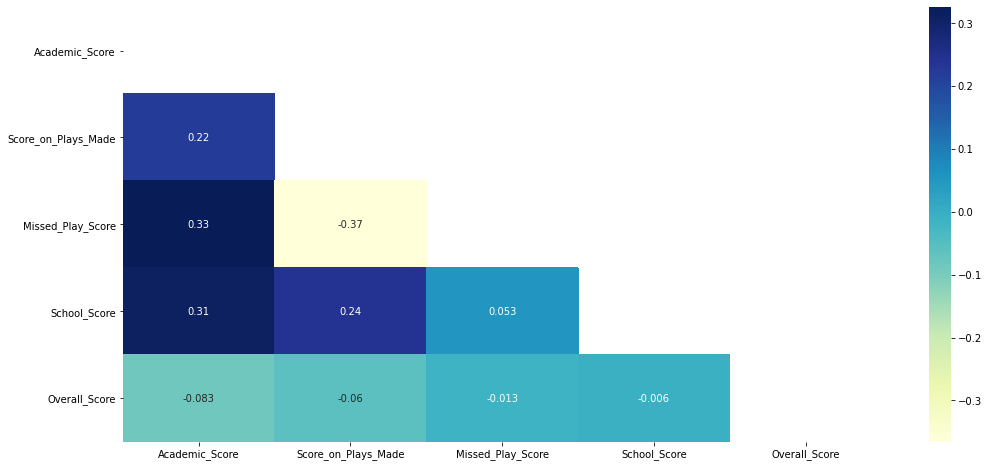

In [256]:
fig_dims = (17, 8)
fig = plt.subplots(figsize=fig_dims)
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
sns.heatmap(round(corr,3), annot=True, mask=mask, cmap="YlGnBu")

Observation

1. Overall score has a low positively correlation with all the 4 variables, depicting that any increase in Academic_Score, Score-on_Plays_Made, Missed_Play_Score, School_Score will reduce Overall_Score to some extent. This might seem counter-intuitive at first, but Overall_Score consists candidate’s family financial state, school performance, psychosocial attitude, etc.

2. School_Score is positively correlated with Score_on_Plays_Made and good Academic, showing perhaps there are better facilities and instruction in a higher scoring school and perhaps a academically bright student can be found in a school with better score.

3. Missed_Play_Score is negatively correlated with Score_on_Plays_Made, understandably because a better performance on field is oppositely correlated with failures on the field. A negative  correlation between Academic_Score and Missed_Play_score tells us, if the student is doing good in his academics then she or he might be doing more mistakes in the field or we can say not focused completely. 

4. Score_on_Plays_Made is positively correlated with Academic_Scores, showing performance in academics and sports are important for this group of students.

**HOW CAN FAILURE IN THE FIELD AND ACHIEVEMENTS IN THE FIELD BOTH BE +VELY CORRELATED WITH THE ACADEMIC SCORE???**

5.** School score is a better indicator for determining a student's performance in overall genre.**

## Categorical & Categorical

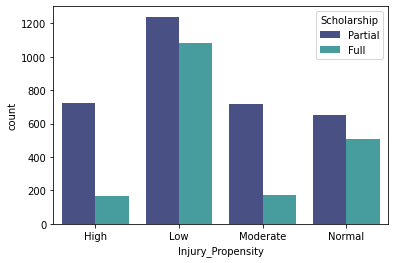

In [257]:
#Injury_Propensity & Scholarship
sns.countplot(x='Injury_Propensity', hue='Scholarship', data=df_football, palette= "mako")
plt.show()

In [258]:
pd.crosstab(df_football.Scholarship, df_football.Injury_Propensity, margins=True)

Injury_Propensity,High,Low,Moderate,Normal,All
Scholarship,,,,,
Full,165,1083,175,508,1931
Partial,725,1240,718,654,3337
All,890,2323,893,1162,5268


Observations
1. It can be seen that the majority of the Full scholarships are provided to the students who belongs to Low and Normal Injury Propensity
2. Students with High and Moderate Injury propensity seems to have a similar distribution in terms of Scholarships (both Partial and Full)
3. It can be seen that students with low injury propensity will have higher chance of getting the scholarship. Low injury propensity also has higher Partial Scholarships in all.
4. High and Moderate Propensity for Injury students are most likely to receive partial scholarship, if at all.

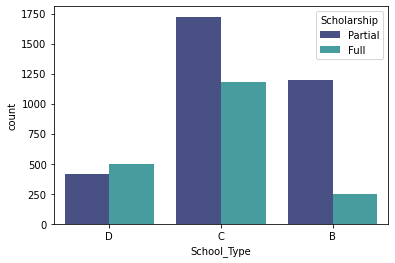

In [259]:
#School_Type & Scholarship
sns.countplot(x='School_Type', hue='Scholarship', data=df_football, palette='mako')
plt.show()

In [260]:
pd.crosstab(df_football.Scholarship, df_football.School_Type, margins=True)

School_Type,B,C,D,All
Scholarship,,,,
Full,250,1183,498,1931
Partial,1196,1723,418,3337
All,1446,2906,916,5268


Observations
1. It can be seen that School D more has students with Full Scholarship than Partial Scholarship.
2. School C having the highest number of students contributes max to the dataset. Scholarship has a 60-40 ratio in school C.
3. In school B only 17% if students enjoys full scholarship

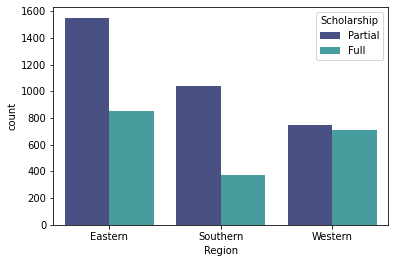

In [261]:
# Region & Scholarship
sns.countplot(x='Region', hue='Scholarship', data=df_football, palette='mako')
plt.show()

In [262]:
pd.crosstab(df_football.Scholarship, df_football.Region, margins=True)

Region,Eastern,Southern,Western,All
Scholarship,,,,
Full,852,371,708,1931
Partial,1551,1037,749,3337
All,2403,1408,1457,5268


Observations
1. It can be seen that Western Region has students with highest percentage of Full Scholarship(49%). 
2. Even though Eastern region has maximum number of students in the dataset, still only 35% of students enjoys Full Scholarship.
3.Southern Region and Western Regions have similar number of studenta with Scholarship, but Southern Region has only 26% of students enjoying Full Scholarship.

## Boxplot - Categorical & Numeric

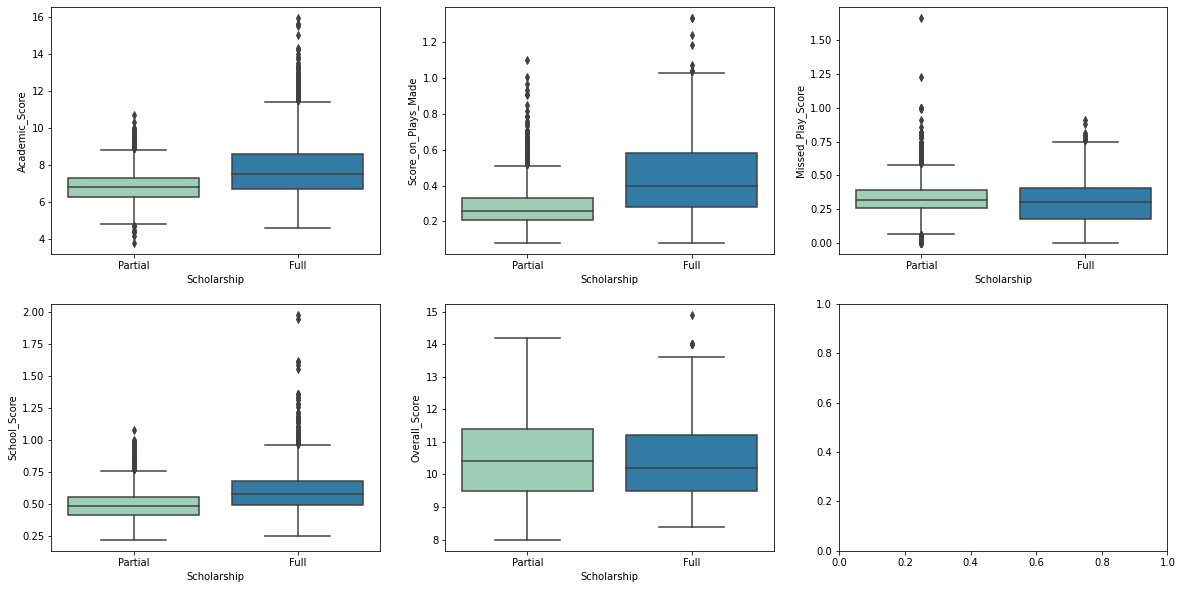

In [263]:
#only with Scholarship
fig_dims = (20, 10)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=fig_dims)
sns.boxplot(x='Scholarship', y='Academic_Score', data=df_football, ax=axs[0][0], palette='YlGnBu')
sns.boxplot(x='Scholarship', y='Score_on_Plays_Made', data=df_football, ax=axs[0][1], palette='YlGnBu')
sns.boxplot(x='Scholarship', y='Missed_Play_Score', data=df_football, ax=axs[0][2], palette='YlGnBu')
sns.boxplot(x='Scholarship', y='School_Score', data=df_football, ax=axs[1][0], palette='YlGnBu')
sns.boxplot(x='Scholarship', y='Overall_Score', data=df_football, ax=axs[1][1], palette='YlGnBu')

plt.show()

Observations
1. Students with higher Academic_Score are more likely to get a Scholarship. Students with score more than 12 will likely to get a Full Scholarship
2. he boxplot of Full scholarship is much wider, showing that Students with higher Score_on_Play_Made are more likely to get Full Scholarship. 
3. High Missed_Play_Score will lead not to get a Full scholarship
4. Students with higher School_Score would likely to get a Full Scholarship
5. Overall_Score distribution seems simlar for both Full and Partial.

The boxplot corroborates the findings of the Pairplot above. Additionally, it shows the presence of significant outliers in almost all the variables. 

We present a detailed analyses of variable distribution and detailed outlier below. 

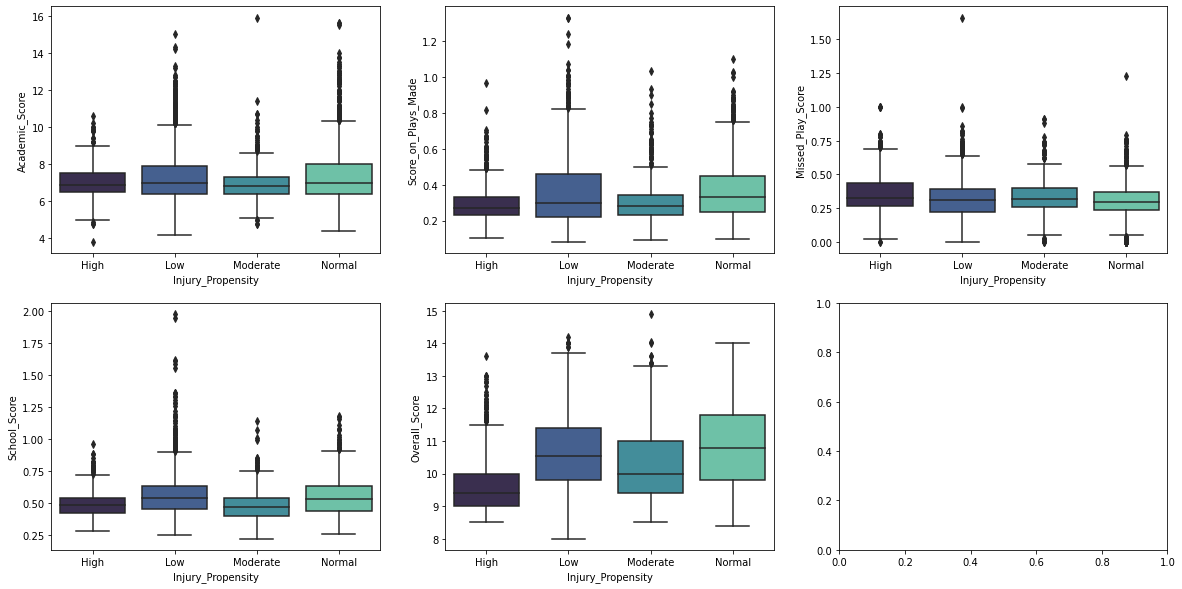

In [264]:
#only with Injury Propensity
fig_dims = (20, 10)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=fig_dims)
sns.boxplot(x='Injury_Propensity', y='Academic_Score', data=df_football, ax=axs[0][0], palette="mako")
sns.boxplot(x='Injury_Propensity', y='Score_on_Plays_Made', data=df_football, ax=axs[0][1], palette="mako")
sns.boxplot(x='Injury_Propensity', y='Missed_Play_Score', data=df_football, ax=axs[0][2], palette="mako")
sns.boxplot(x='Injury_Propensity', y='School_Score', data=df_football, ax=axs[1][0], palette="mako")
sns.boxplot(x='Injury_Propensity', y='Overall_Score', data=df_football, ax=axs[1][1], palette="mako")

plt.show()

Observation
1. The median for Injury Propensity seems to be near each other for Academic_Score, Missed_Play_Score and Score_on_Play_Made
2. Slight fluctuation can be seen in School_Score
3. While Overall_Score seems to be out of trend as compared to other DV. The Medians are not near to each other.

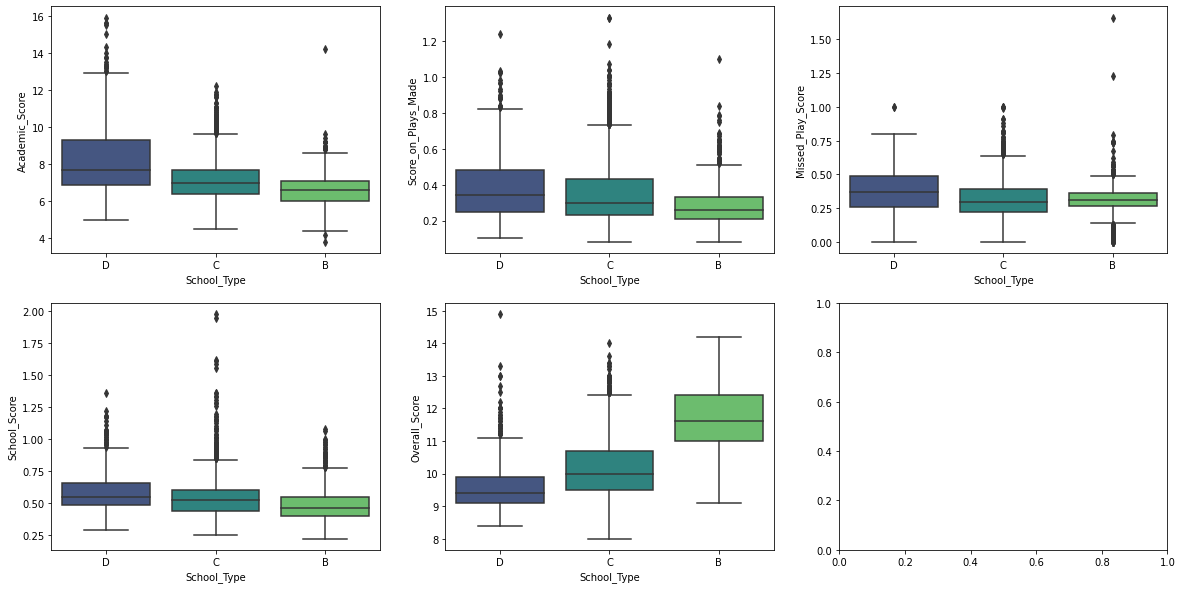

In [265]:
#only with School_Type
fig_dims = (20, 10)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=fig_dims)
sns.boxplot(x='School_Type', y='Academic_Score', data=df_football, ax=axs[0][0], palette="viridis")
sns.boxplot(x='School_Type', y='Score_on_Plays_Made', data=df_football, ax=axs[0][1], palette="viridis")
sns.boxplot(x='School_Type', y='Missed_Play_Score', data=df_football, ax=axs[0][2], palette="viridis")
sns.boxplot(x='School_Type', y='School_Score', data=df_football, ax=axs[1][0], palette="viridis")
sns.boxplot(x='School_Type', y='Overall_Score', data=df_football, ax=axs[1][1], palette="viridis")

plt.show()

Observations
1. School D students scores the highest Academic_Score. While the lowest Scorer belongs to School B. All have outliers.
2. Schools D and School C are competing scores when it comes to making points on the field i.e., Scores_On_Play_Made. All have outliers.
3. School D students are making **MORE?**less mistakes on the field compared to School C which has more outliers than School D. However, School B students are making the most/**LEAST?** mistakes among all three schools.
4. School_Type D has a Schools with higher School_Score, followed by C and then B. All have Outliers.
5. The Overall_Score is most for School B , followed by School C then School D. Although few outliers on School D has higher values than the other two.

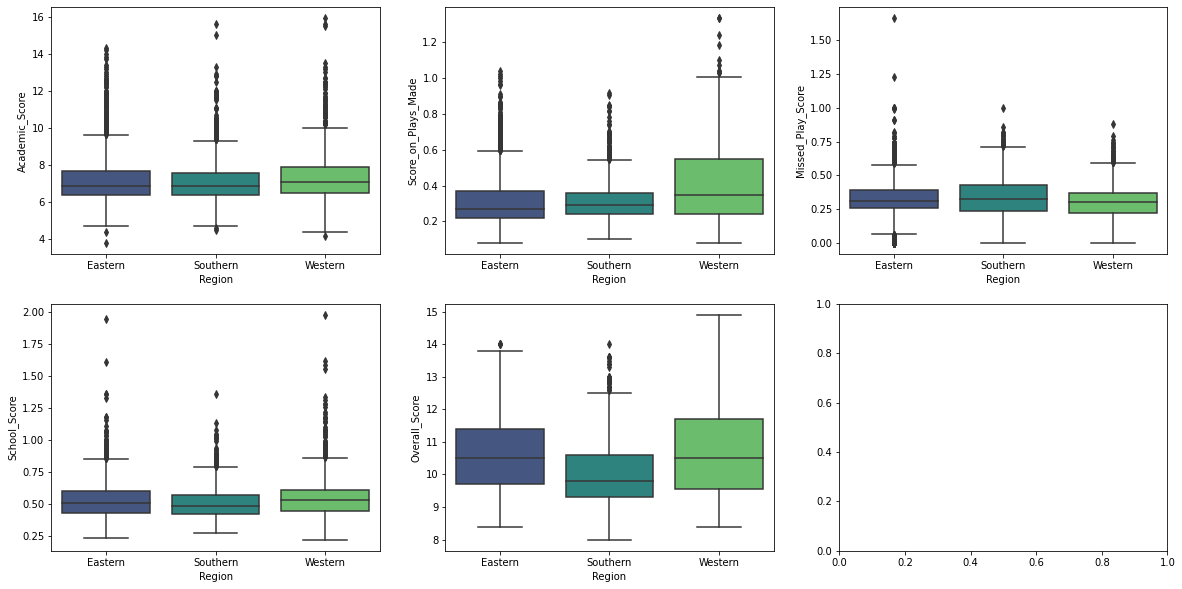

In [266]:
#only with Region
fig_dims = (20, 10)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=fig_dims)
sns.boxplot(x='Region', y='Academic_Score', data=df_football, ax=axs[0][0], palette= 'viridis')
sns.boxplot(x='Region', y='Score_on_Plays_Made', data=df_football, ax=axs[0][1], palette= 'viridis')
sns.boxplot(x='Region', y='Missed_Play_Score', data=df_football, ax=axs[0][2], palette= 'viridis')
sns.boxplot(x='Region', y='School_Score', data=df_football, ax=axs[1][0], palette= 'viridis')
sns.boxplot(x='Region', y='Overall_Score', data=df_football, ax=axs[1][1], palette= 'viridis')

plt.show()

Observations
1. Academic_Score is comparable for all regions.
2. Western Region is the highest scorer on the field it seems, as depicted by the Score_on_Plays_Made boxplot.
3. Eastern and Western Regions are similar in mistakes on the field (Missed_Play_Score), Southern has little more spread in the data.
4. School_Scores are similar for all three Regions.
5. Overall_Scores is the highest fr Western, closely followed by Eastern, wit Southern trailing the two. 

There are many Outliers in almost every variable(Acedemic score,Score_on_Plays_Made,Missed_Play_Score,School_Score and Overall_Score).

## Multivariate Analysis

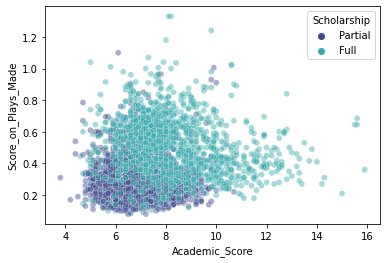

In [267]:
import seaborn as sns
sns.scatterplot(x='Academic_Score', y= 'Score_on_Plays_Made', hue = 'Scholarship', data=df_football, palette='mako', alpha=0.45)

plt.show()

Observations
1. With increase in Academic_Score and Score_on_Play_Made chances of getting a full scholarship will increase. **At score more than 11 the student will get a full scholarship**
2. With low Score_on_Play_Made and low Academic_Score Student will more likely to get an Partial Scholarship.
3. The corelation is positive

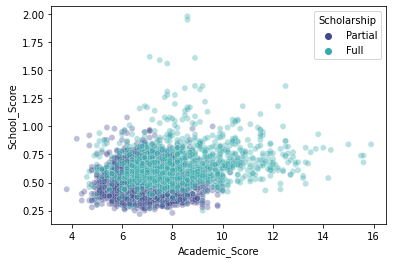

In [268]:
sns.scatterplot(x='Academic_Score', y= 'School_Score', hue = 'Scholarship', data=df_football, palette='mako', alpha = 0.35)

plt.show()

Observation
1. At higher School_Score (>1.25) Student is more likely to get an full scholarship. For lower values we can see a overlap of datapoints
2. There is somewhat of a positive correlation
3. Students with low School_Score will not get a Full Scholarship. Inversely, students with a high School_Score are most likely to get Full Scholarship. Students who belong to higher performing Schools and and average academic scores AND Students who have high Academic Scores from average schools receive Full Scholarship. 

4. If the School score falls below 0.5, likelihood of both possibilities, Full and Partial, coexist. There are few students with low School_Score and low Academic_Score who have got the Full Scholarship and this can be investigated further.

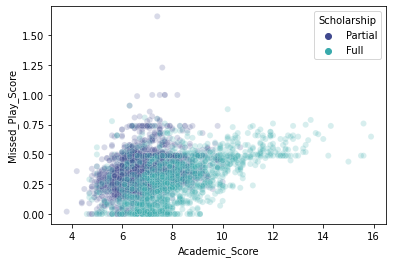

In [270]:
sns.scatterplot(x='Academic_Score', y= 'Missed_Play_Score', hue = 'Scholarship', data=df_football, palette='mako', alpha = 0.20)

plt.show()

Observation
1. As the Score_for_Missed play passes the threshold of 0.75, chances for a student to get a Full Scholarship gets low.
2. From the scatterplot it can be seen that even at the lower Academic Score and 0 Missed_Play_Scores students are managed to get a Full Scholarship.
3. It means if a student is able to cut down the on field mistakes he might end u getting a Full Scholarship, despite a low score.
4. At Academic_Scores beyond 11, Missed_Play_Score are all higher than 0.5, yet all students secured a Full Scholarship.

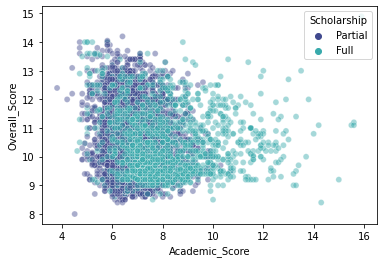

In [142]:
sns.scatterplot(x='Academic_Score', y= 'Overall_Score', hue = 'Scholarship', data=df_football, palette='mako', alpha = 0.45)
plt.show()

Observation
1. At Academic_Scores < 6, very few incidents of Full Scholarship are present. Perhaps they are only present due to the influence of other variables.
2. At Academic_score > 11, Full Scholarship is almost certain at varying Overall_Scores.
3. There is an "outlier" at Academic_score of 16 and Overall_score of 15. In the absence of any documentation, it seems like a high performing case, and not an outlier that disturbs the model. We explore Outliers in the next section.


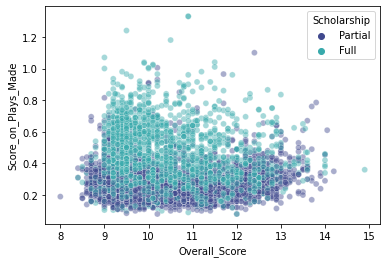

In [143]:
sns.scatterplot(x='Overall_Score', y= 'Score_on_Plays_Made', hue = 'Scholarship', data=df_football, palette='mako', alpha = 0.45)
plt.show()

Observation
1. Overall Score is scattered throughout, there is no significant trend that can be seen here.

2. For all values of Overall_Scores, Scores_on_Plays_Made > 0.5 has shows likelihood of a Full Scholarship. This is in line with our earlier observations in the Pairplot and Boxplots.



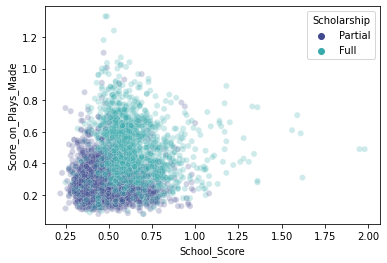

In [271]:
sns.scatterplot(x='School_Score', y= 'Score_on_Plays_Made', hue = 'Scholarship', data=df_football,palette='mako', alpha = 0.24)
plt.show()

Observation
1. Scoring high in School_Score will a student a Full Scholarship even if their Score_on Play_Made is not much.
2. There are few cases with very low School_Score and low Score_on_Play_Made.
3. There is a positive correlation between there two independent variables.
4. Some students with lower School_Score and high Score_on_Play_Made have gotten Full Scholarship. This can be investigated further.


##Outliers

#### Outliers in Missed_Play_Score

In [145]:
Missed_Play_Score_wisk_low

0.024999999999999967

In [146]:
df_football[df_football['Missed_Play_Score'] < Missed_Play_Score_wisk_low]\
.sort_values('Missed_Play_Score')['Missed_Play_Score'].drop_duplicates()\
.head(200)

110     0.00
3880    0.01
5359    0.02
Name: Missed_Play_Score, dtype: float64

In [147]:
df_football[df_football['Missed_Play_Score'] > Missed_Play_Score_wisk_high]\
.sort_values('Missed_Play_Score')['Missed_Play_Score'].drop_duplicates().head(200)

81      0.63
2448    0.64
2451    0.65
2918    0.66
4608    0.67
4962    0.68
657     0.69
4773    0.70
2688    0.71
3561    0.72
2526    0.73
1220    0.74
5182    0.75
5075    0.76
4397    0.78
5034    0.79
2931    0.80
1002    0.81
2702    0.82
3989    0.86
199     0.88
4438    0.91
1471    0.99
3330    1.00
3014    1.23
719     1.66
Name: Missed_Play_Score, dtype: float64

#### Outliers in Academic_Score

In [148]:
df_football[df_football['Academic_Score'] > Academic_Score_wisk_high]\
.sort_values('Academic_Score')['Academic_Score'].drop_duplicates().head(500)

5371     9.7
5349     9.8
5262     9.9
5645    10.0
4804    10.1
5597    10.2
5730    10.3
5131    10.4
5867    10.5
5022    10.6
5541    10.7
4935    10.8
5864    10.9
4895    11.0
5405    11.1
4701    11.2
5921    11.3
4961    11.4
5077    11.5
4898    11.6
5252    11.7
5363    11.8
5039    11.9
5323    12.0
5329    12.1
5630    12.2
5112    12.3
5183    12.4
5148    12.5
5040    12.6
5268    12.7
5108    12.8
5472    12.9
5146    13.0
5279    13.2
5345    13.3
5009    13.4
5034    13.5
5062    13.7
5028    13.8
5055    14.0
1446    14.2
5216    14.3
4928    15.0
5226    15.5
5229    15.6
5318    15.9
Name: Academic_Score, dtype: float64

In [149]:
df_football[df_football['Academic_Score'] < Academic_Score_wisk_low]\
.sort_values('Academic_Score')['Academic_Score'].drop_duplicates().head(200)

4074    3.8
2753    4.2
4252    4.4
Name: Academic_Score, dtype: float64

#### Outliers in Score_on_Plays_Made

In [150]:
df_football[df_football['Score_on_Plays_Made'] > Score_on_Plays_wisk_high]\
.sort_values('Score_on_Plays_Made')['Score_on_Plays_Made'].drop_duplicates().head(500)

4930    0.660
5033    0.665
5031    0.670
6026    0.675
4848    0.680
5120    0.685
5168    0.690
4455    0.695
6095    0.700
4857    0.705
5664    0.710
5535    0.715
5387    0.720
4758    0.725
5333    0.730
4900    0.735
5886    0.740
4826    0.745
5877    0.750
5282    0.755
5401    0.760
5051    0.765
5098    0.770
5966    0.775
5106    0.780
4593    0.785
5938    0.790
5678    0.795
5832    0.800
4865    0.805
6015    0.810
5875    0.815
5443    0.820
5209    0.825
5676    0.830
5270    0.835
6134    0.840
1400    0.850
6160    0.855
5632    0.860
5390    0.865
5964    0.870
5392    0.875
5317    0.880
5838    0.885
5456    0.890
6118    0.895
5543    0.900
356     0.905
5416    0.910
5305    0.915
5355    0.920
2056    0.930
4740    0.935
4850    0.950
6039    0.960
2666    0.965
5349    0.980
5436    1.000
1860    1.005
5517    1.010
5364    1.020
5372    1.025
5367    1.035
5225    1.040
4811    1.070
3859    1.100
5945    1.180
5337    1.240
4818    1.330
Name: Score_on_Plays

In [151]:
df_football[df_football['Score_on_Plays_Made'] < Score_on_Plays_wisk_low]\
.sort_values('Score_on_Plays_Made')['Score_on_Plays_Made'].drop_duplicates().head(200)

Series([], Name: Score_on_Plays_Made, dtype: float64)

#### Outliers in School_Score

In [152]:
df_football[df_football['School_Score'] > School_Score_wisk_high]\
.sort_values('School_Score')['School_Score'].drop_duplicates().head(500)

5725    0.86
5853    0.87
4895    0.88
2753    0.89
5167    0.90
4950    0.91
5434    0.92
5028    0.93
6035    0.94
4618    0.95
5291    0.96
733     0.97
5031    0.98
5597    0.99
2559    1.00
4388    1.01
4868    1.02
4887    1.03
5176    1.04
5354    1.05
5415    1.06
5508    1.07
4686    1.08
4925    1.09
5812    1.10
5057    1.11
5050    1.13
4775    1.14
5900    1.15
5805    1.16
5356    1.17
5021    1.18
4738    1.20
4780    1.22
4943    1.26
4715    1.28
4797    1.31
5952    1.33
5702    1.34
5306    1.36
4711    1.56
4857    1.59
4911    1.61
5385    1.62
4778    1.95
4784    1.98
Name: School_Score, dtype: float64

In [153]:
df_football[df_football['School_Score'] < School_Score_wisk_low]\
.sort_values('School_Score')['School_Score'].drop_duplicates().head(200)

Series([], Name: School_Score, dtype: float64)

#### Outliers in Overall_Score 

In [154]:
df_football[df_football['Overall_Score'] > Overall_Score_wisk_high]\
.sort_values('Overall_Score')['Overall_Score'].drop_duplicates().head(500)

4309    14.05
3739    14.20
5318    14.90
Name: Overall_Score, dtype: float64

In [155]:
df_football[df_football['Overall_Score'] < Overall_Score_wisk_low]\
.sort_values('Overall_Score')['Overall_Score'].drop_duplicates().head(200)

Series([], Name: Overall_Score, dtype: float64)

Observation
- For Academic_Score, the lower outliers have values 3.8 to 4.4 and High Outliers have values between 9.7 to 15.9.  But in anywhere in Data dictionary, this has not been mentioned what could the possible range of score or on which scale these scores are measured. In Normal scenario, 10,12 or even 15 marks doesn't seems unrealistic we are keeping the outliers.   

- if we see the lower outliers for variable "Missed_Play_Score", there many records with value 0.0 t0 0.02. and for Higher outliers most of observation have values between 0.63 to 1 except two records which has values as 1.23 and 1.66. Again the value doesn't seems unrealistic so keeping the outliers

- Same is the case with School_Score and Overall_Score where scales are not mentioned that on which scale School_Score/Overall_Score has been measured.

We did not want to drop the outliers initially, given that the points are not invalid. However, keeping in mind the performance of Logistic Model, we will be treating the outliers by flooring and capping them. 

### Treat Outliers

In [156]:
df_football['Academic_Score'] = np.where(df_football['Academic_Score'] < Academic_Score_wisk_low, Academic_Score_wisk_low, df_football['Academic_Score'])
df_football['Academic_Score'] = np.where(df_football['Academic_Score'] > Academic_Score_wisk_high, Academic_Score_wisk_high, df_football['Academic_Score'])

df_football['Score_on_Plays_Made'] = np.where(df_football['Score_on_Plays_Made'] < Score_on_Plays_wisk_low, Score_on_Plays_wisk_low, df_football['Score_on_Plays_Made'])
df_football['Score_on_Plays_Made'] = np.where(df_football['Score_on_Plays_Made'] > Score_on_Plays_wisk_high, Score_on_Plays_wisk_high, df_football['Score_on_Plays_Made'])

df_football['Missed_Play_Score'] = np.where(df_football['Missed_Play_Score'] < Missed_Play_Score_wisk_low, Missed_Play_Score_wisk_low, df_football['Missed_Play_Score'])
df_football['Missed_Play_Score'] = np.where(df_football['Missed_Play_Score'] > Missed_Play_Score_wisk_high, Missed_Play_Score_wisk_high, df_football['Missed_Play_Score'])

df_football['Overall_Score'] = np.where(df_football['Overall_Score'] < Overall_Score_wisk_low, Overall_Score_wisk_low, df_football['Overall_Score'])
df_football['Overall_Score'] = np.where(df_football['Overall_Score'] > Overall_Score_wisk_high, Overall_Score_wisk_high, df_football['Overall_Score'])

df_football['School_Score'] = np.where(df_football['School_Score'] < School_Score_wisk_low, School_Score_wisk_low, df_football['School_Score'])
df_football['School_Score'] = np.where(df_football['School_Score'] > School_Score_wisk_high, School_Score_wisk_high, df_football['School_Score'])


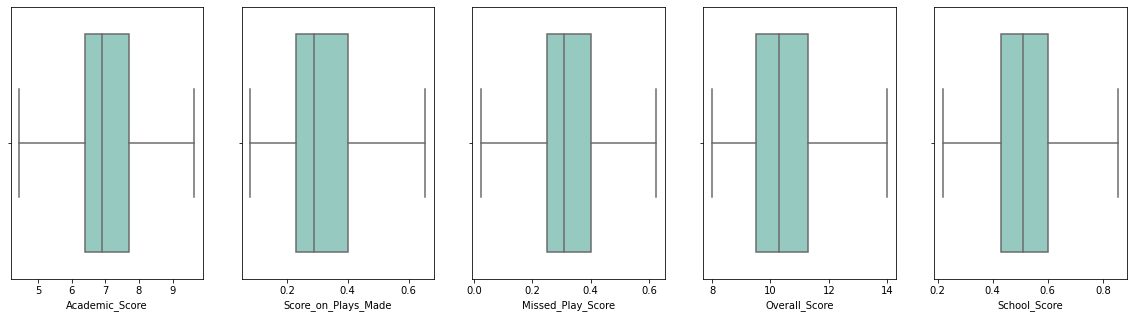

In [157]:
# Boxplots showing that the outliers have now been treated
fig_dims = (20, 5) 
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=fig_dims) 
sns.boxplot(df_football.Academic_Score, ax=axs[0], palette = 'Set3') 
sns.boxplot(df_football.Score_on_Plays_Made, ax=axs[1], palette = 'Set3')
sns.boxplot(df_football.Missed_Play_Score, ax= axs[2], palette = 'Set3') 
sns.boxplot(df_football.Overall_Score, ax=axs[3],palette = 'Set3')
sns.boxplot(df_football.School_Score, ax= axs[4], palette = 'Set3') 
plt.show()


We have now treated the outliers without compromising on number of records.

### Encoding: Convert Categorical Variable into Numerical

In [158]:
df_football['Scholarship'] = np.where(df_football['Scholarship']=='Full',1,0).astype('int64')

Encoding follows an lexicographic ordering, meaning F of Full in Scholarship comes first, so it will be coded as 0, Partial will be coded as 1. However, we manually coded it because we wanted Full to be cencoded as 1 to assist model interpretation.

In [159]:
df_football.head()

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Type,School_Score,Overall_Score,Region,Scholarship
0,7.0,0.27,0.36,High,D,0.45,8.8,Eastern,0
1,6.3,0.30,0.34,Low,C,0.49,9.5,Eastern,0
2,8.1,0.28,0.40,Moderate,C,0.44,10.1,Eastern,0
3,7.2,0.23,0.32,Moderate,C,0.40,9.9,Eastern,0
6,6.2,0.32,0.16,Moderate,C,0.47,9.6,Eastern,1


In [160]:
df_football['Scholarship'].value_counts()

0    3337
1    1931
Name: Scholarship, dtype: int64

In [161]:
df_football_final=pd.get_dummies(df_football,drop_first=True)

In [162]:
df_football_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5268 entries, 0 to 6214
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Academic_Score              5268 non-null   float64
 1   Score_on_Plays_Made         5268 non-null   float64
 2   Missed_Play_Score           5268 non-null   float64
 3   School_Score                5268 non-null   float64
 4   Overall_Score               5268 non-null   float64
 5   Scholarship                 5268 non-null   int64  
 6   Injury_Propensity_Low       5268 non-null   uint8  
 7   Injury_Propensity_Moderate  5268 non-null   uint8  
 8   Injury_Propensity_Normal    5268 non-null   uint8  
 9   School_Type_C               5268 non-null   uint8  
 10  School_Type_D               5268 non-null   uint8  
 11  Region_Southern             5268 non-null   uint8  
 12  Region_Western              5268 non-null   uint8  
dtypes: float64(5), int64(1), uint8(7)

In [163]:
corr1 = df_football_final.corr()
round(corr1,2)

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,School_Score,Overall_Score,Scholarship,Injury_Propensity_Low,Injury_Propensity_Moderate,Injury_Propensity_Normal,School_Type_C,School_Type_D,Region_Southern,Region_Western
Academic_Score,1.00,0.23,0.30,0.29,-0.11,0.36,0.06,-0.10,0.08,0.00,0.36,-0.02,0.07
Score_on_Plays_Made,0.23,1.00,-0.38,0.26,-0.06,0.48,0.10,-0.10,0.10,0.09,0.15,-0.08,0.24
Missed_Play_Score,0.30,-0.38,1.00,0.04,-0.01,-0.13,-0.11,0.05,-0.03,-0.14,0.19,0.09,-0.12
School_Score,0.29,0.26,0.04,1.00,0.00,0.37,0.16,-0.17,0.07,0.04,0.18,-0.07,0.06
Overall_Score,-0.11,-0.06,-0.01,0.00,1.00,-0.04,0.16,-0.07,0.17,-0.28,-0.36,-0.24,0.11
Scholarship,0.36,0.48,-0.13,0.37,-0.04,1.00,0.18,-0.16,0.08,0.09,0.17,-0.13,0.15
Injury_Propensity_Low,0.06,0.10,-0.11,0.16,0.16,0.18,1.00,-0.40,-0.47,-0.05,-0.25,-0.10,0.10
Injury_Propensity_Moderate,-0.10,-0.10,0.05,-0.17,-0.07,-0.16,-0.40,1.00,-0.24,0.26,-0.14,0.09,-0.10
Injury_Propensity_Normal,0.08,0.10,-0.03,0.07,0.17,0.08,-0.47,-0.24,1.00,-0.08,0.01,-0.10,0.11
School_Type_C,0.00,0.09,-0.14,0.04,-0.28,0.09,-0.05,0.26,-0.08,1.00,-0.51,0.11,-0.11


Q2. Build various iterations of the Logistic Regression model using appropriate variable selection techniques for the full data. Compare values of model selection criteria for proposed models. Compare as many criteria as you feel are suitable.

Use Full Data to develop a logistic regression model to identify significant predictors. Check whether the proposed model is free of multicollinearity. Apply variable selection method as required. Show all intermediate models leading to the final model. Justify your choice of the final model. Which are the significant predictors?

#### Build Model with all The Features

In [164]:
import statsmodels.formula.api as sm

In [165]:
df_football_final.columns
df_football_final.shape

(5268, 13)

In [166]:
formula_1='Scholarship~Academic_Score+Score_on_Plays_Made+Missed_Play_Score+School_Score+Overall_Score+Injury_Propensity_Low+Injury_Propensity_Normal+\
Injury_Propensity_Moderate+School_Type_C+School_Type_D+Region_Southern+Region_Western'

In [167]:
Logistic_1 = sm.logit(formula=formula_1,data=df_football_final).fit()

Optimization terminated successfully.
         Current function value: 0.444094
         Iterations 6


The method of estimation follows an iterative process called Fisher Scoring Algorithm. It is important that the algorithm converges. In the current situation convergence took place in 6 iterations.

In [168]:
Logistic_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 5268
Model:                          Logit   Df Residuals:                     5255
Method:                           MLE   Df Model:                           12
Date:                Mon, 12 Apr 2021   Pseudo R-squ.:                  0.3242
Time:                        15:56:15   Log-Likelihood:                -2339.5
converged:                       True   LL-Null:                       -3461.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -10.6622      0.556    -19.182      0.000     -11.752      -9.573
Academic_Score                 0.4261      0.044      9.722      0.000       0.340       0.512
Score_on_Plays_Made            5.1082      0.323     15.814      0.000       4.475       5.741
Missed_Play_Score             -1.4742      0.345     -4.270      0.000      -2.151      -0.797
School_Score                   2.8372      0.312      9.083      0.000       2.225       3.449
Overall_Score                  0.2025      0.045      4.538      0.000       0.115       0.290
Injury_Propensity_Low          1.6842      0.150     11.209      0.000       1.390       1.979
Injury_Propensity_Normal       1.2277      0.154      7.956      0.000       0.925       1.530
Injury_Propensity_Moderate     0.5718      0.157      3.652      0.000       0.265       0.879
School_Type_C                  1.3057      0.125     10.465      0.000       1.061       1.550
School_Type_D                  2.3572      0.211     11.166      0.000       1.943       2.771
Region_Southern               -0.4820      0.091     -5.277      0.000      -0.661      -0.303
Region_Western                 0.0163      0.092      0.177      0.859      -0.164       0.196
==============================================================================================
"""

#####Check for multicollinearity in the predictor variables using Variance Inflation Factor (VIF).

In [169]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [170]:
vif_cal(input_data=df_football_final.drop('Scholarship',axis=1))

Academic_Score  VIF =  1.7
Score_on_Plays_Made  VIF =  1.61
Missed_Play_Score  VIF =  1.52
School_Score  VIF =  1.29
Overall_Score  VIF =  2.01
Injury_Propensity_Low  VIF =  3.54
Injury_Propensity_Moderate  VIF =  2.07
Injury_Propensity_Normal  VIF =  2.6
School_Type_C  VIF =  2.94
School_Type_D  VIF =  4.22
Region_Southern  VIF =  1.23
Region_Western  VIF =  1.26


#####Dropping Region_Western

In [171]:
formula_2='Scholarship~Academic_Score+Score_on_Plays_Made+Missed_Play_Score+School_Score+Overall_Score+Injury_Propensity_Low+Injury_Propensity_Normal+\
Injury_Propensity_Moderate+School_Type_C+School_Type_D+Region_Southern'

In [172]:
Logistic_2 = sm.logit(formula=formula_2,data=df_football_final).fit()

Optimization terminated successfully.
         Current function value: 0.444097
         Iterations 6


In [173]:
Logistic_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 5268
Model:                          Logit   Df Residuals:                     5256
Method:                           MLE   Df Model:                           11
Date:                Mon, 12 Apr 2021   Pseudo R-squ.:                  0.3242
Time:                        15:56:16   Log-Likelihood:                -2339.5
converged:                       True   LL-Null:                       -3461.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -10.6592      0.556    -19.184      0.000     -11.748      -9.570
Academic_Score                 0.4264      0.044      9.732      0.000       0.340       0.512
Score_on_Plays_Made            5.1181      0.318     16.086      0.000       4.494       5.742
Missed_Play_Score             -1.4756      0.345     -4.276      0.000      -2.152      -0.799
School_Score                   2.8368      0.312      9.081      0.000       2.225       3.449
Overall_Score                  0.2023      0.045      4.535      0.000       0.115       0.290
Injury_Propensity_Low          1.6863      0.150     11.260      0.000       1.393       1.980
Injury_Propensity_Normal       1.2302      0.154      8.006      0.000       0.929       1.531
Injury_Propensity_Moderate     0.5728      0.156      3.662      0.000       0.266       0.879
School_Type_C                  1.3039      0.124     10.485      0.000       1.060       1.548
School_Type_D                  2.3566      0.211     11.165      0.000       1.943       2.770
Region_Southern               -0.4876      0.086     -5.697      0.000      -0.655      -0.320
==============================================================================================
"""

**The positive coefficients indicate predictors for which an increase in the value of the predictor is associated with an increase in the probability of Full Scholarship, the target class of interest, now denoted by 1. Similarly, negative coefficients indicate predictors associated with reducing the probability Full Scholarship. 

Unit increases in Academic_Score, Score_on_Plays_Made, School_Score and Overall_Score are associated with an increase in the probability of Full Scholarship.

So, a higher Missed_Play_Score reduces the probability of Full Scholarship. Similarly, for Region_Southern also reduces the probability of Full Scholarship.

Unlike a Linear Regression, where coefficients direclty denote the degree of relationship between the Dependent and Independent Variable (because they are linearly related), in Logistic Regression, the relationship is that of the variable increase or decrease leading to the odds of the dependent variable changing by an exponentof the coefficient

E.g., For every unit of increase in School_Score, the odds of receiving Full Scholarship increases by e(2.8372). **bold text****

In [174]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [175]:
vif_cal(input_data=df_football_final.drop(['Scholarship','Region_Western'],axis=1))

Academic_Score  VIF =  1.7
Score_on_Plays_Made  VIF =  1.56
Missed_Play_Score  VIF =  1.52
School_Score  VIF =  1.29
Overall_Score  VIF =  2.01
Injury_Propensity_Low  VIF =  3.53
Injury_Propensity_Moderate  VIF =  2.07
Injury_Propensity_Normal  VIF =  2.58
School_Type_C  VIF =  2.92
School_Type_D  VIF =  4.21
Region_Southern  VIF =  1.09


Q3. Split the data into training (70%) and test (30%) in such a way that the uniformity in the training as well as test is maintained every time the code is run. Check the whether the proportion of the different classes within the target variable is same across train and test.


If prediction accuracy of the full scholarship is the only objective, then you may want to divide the data into a training and a test set, chosen randomly, and use the training set to develop a model and test set to validate your model. Use the models developed in Part (II) to compare accuracy in training and test sets. Compare the final model of Part (II) and the proposed one in Part (III). Which model provides the most accurate prediction? If the model found in Part (II) is different from the proposed model in Part (III), give an explanation.

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
Train,Test = train_test_split(df_football_final,test_size=0.3,random_state=1,stratify=df_football_final['Scholarship'])

In [178]:
from sklearn.linear_model import LogisticRegression

In [179]:
LR = LogisticRegression(solver='newton-cg',penalty='none')

In [180]:
Train.columns

Index(['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score',
       'School_Score', 'Overall_Score', 'Scholarship', 'Injury_Propensity_Low',
       'Injury_Propensity_Moderate', 'Injury_Propensity_Normal',
       'School_Type_C', 'School_Type_D', 'Region_Southern', 'Region_Western'],
      dtype='object')

In [181]:
print("Distribution of classes in dataset")
print(df_football['Scholarship'].value_counts(1))
print('\n')
print("Distribution of classes in Train data")
print(Train['Scholarship'].value_counts(1))
print('\n')
print("Distribution of classes in Test data")
print(Test['Scholarship'].value_counts(1))

Distribution of classes in dataset
0    0.633447
1    0.366553
Name: Scholarship, dtype: float64


Distribution of classes in Train data
0    0.633577
1    0.366423
Name: Scholarship, dtype: float64


Distribution of classes in Test data
0    0.633144
1    0.366856
Name: Scholarship, dtype: float64


Target variable's classes is uniformly distributed in Train and Test.

In [182]:
Test.columns

Index(['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score',
       'School_Score', 'Overall_Score', 'Scholarship', 'Injury_Propensity_Low',
       'Injury_Propensity_Moderate', 'Injury_Propensity_Normal',
       'School_Type_C', 'School_Type_D', 'Region_Southern', 'Region_Western'],
      dtype='object')

### Model 1 - Building the model on the Training Data and checking the Accuracy score on the training data.

In [183]:
model_1 = LR.fit(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_C','School_Type_D','Region_Southern','Region_Western']],Train['Scholarship'])

In [184]:
print('Accuracy Score of Model 1:',model_1.score(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score',
                                                        'Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate',
                                                        'Injury_Propensity_Normal','School_Type_C','School_Type_D','Region_Southern','Region_Western']],Train['Scholarship']))

Accuracy Score of Model 1: 0.8407919717927854


In [185]:
model_1_train_class = model_1.predict(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_C','School_Type_D','Region_Southern','Region_Western']])
model_1_train_proba = model_1.predict_proba(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_C','School_Type_D','Region_Southern','Region_Western']])

### Model 1 - Predicting the classes and the probabilities on the Test Data

In [186]:
model_1_test_class = model_1.predict(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_C','School_Type_D','Region_Southern','Region_Western']])
model_1_test_proba = model_1.predict_proba(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_C','School_Type_D','Region_Southern','Region_Western']])

### Model 2 - Building the model on the Training Data and checking the Accuracy score on the training data.

In [187]:
model_2 = LR.fit(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score',
                        'Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_C',
                        'School_Type_D','Region_Southern']],Train['Scholarship'])

In [188]:
print('Accuracy Score of Model 2 Train:',model_2.score(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_C','School_Type_D','Region_Southern']],Train['Scholarship']))

Accuracy Score of Model 2 Train: 0.8402495253593708


In [189]:
model_2_train_class = model_2.predict(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_C','School_Type_D','Region_Southern']])
model_2_train_proba = model_2.predict_proba(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_C','School_Type_D','Region_Southern']])

### Model 2 - Predicting the classes and the probabilities on the Test Data

In [190]:
model_2_test_class = model_2.predict(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_C','School_Type_D','Region_Southern']])
model_2_test_proba = model_2.predict_proba(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_C','School_Type_D','Region_Southern']])

In [191]:
print('Accuracy Score of Model 2 Test:',model_2.score(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_C','School_Type_D','Region_Southern']],Test['Scholarship']))

Accuracy Score of Model 2 Test: 0.8380771663504112


### Interpreting the Logistic Model using Sklearn

Estimated Regression Equation:
logit (p) = βo + β1 x1

odds ration is = exp(coef(model_2))

Probability of an even happening = exp(coef(model_2))/(1+exp(coef(model_2)))

In [192]:
final_train= Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_C','School_Type_D','Region_Southern']]

In [193]:
#### df=pd.DataFrame({'odds_ratio':(np.exp(model_2.coef_).T).tolist(),'Probability':(np.exp(model_2.coef_)/(1+np.exp(model_2.coef_))).T.tolist()  ,'variable':final_train.columns.tolist()})
### df['odds_ratio'] = df['odds_ratio'].str.get(0)

### df=df.sort_values('odds_ratio', ascending=False)
### df

Observation
Score_On_Plays_Made has the highest impact on the Full Scholarship of the student in the school. To elabourate, Score_On_Plays_Made increasing by one unit will increase the likelihood of Full Salary by **180/165** times. Similarly, increase in one unit of School_Score will increase the likelihood of Full Scholarship by about **19/17** times.

Overall_Score, offered less explanability in the EDA and understandibly, the model has given it the third least importance in deciding the Full Scholarship.

School_Type_D had higher correlation than School_Type_C in the correlation matrix above. This is also reflected by the Logistic Model - a student from School_Type_D has 10.6 times higher liklihood of receiving Full Scholarship.


In [194]:
## using statsmodel library

params = Logistic_2.params
conf = Logistic_2.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                                   5%         95%  Odds Ratio
Intercept                    0.000008    0.000070    0.000023
Academic_Score               1.405647    1.669018    1.531682
Score_on_Plays_Made         89.520104  311.590089  167.013704
Missed_Play_Score            0.116243    0.449693    0.228634
School_Score                 9.249468   31.470376   17.061191
Overall_Score                1.121753    1.336139    1.224262
Injury_Propensity_Low        4.026060    7.241700    5.399585
Injury_Propensity_Normal     2.532034    4.624440    3.421877
Injury_Propensity_Moderate   1.305033    2.409580    1.773297
School_Type_C                2.886916    4.700558    3.683764
School_Type_D                6.978774   15.962673   10.554614
Region_Southern              0.519238    0.726230    0.614073


## Observation: 

## Score_On_Plays_Made has the highest impact on the Full Scholarship of the student in the school. To elabourate, Score_On_Plays_Made increasing by one unit will increase the likelihood of Full Salary by 165 times. Similarly, increase in one unit of School_Score will increase the likelihood of Full Scholarship by about 17 times.

## Overall_Score, offered less explanability in the EDA and understandibly, the model has given it the third least importance in deciding the Full Scholarship.

## School_Type_D had higher correlation than School_Type_C in the correlation matrix above. This is also reflected by the Logistic Model - a student from School_Type_D has 10.6 times higher liklihood of receiving Full Scholarship.

### Model Evaluation # Compare the Performance of Model1 and Model2

In [202]:
from sklearn.metrics import classification_report, confusion_matrix

### Confusion Matrix For Train and Test Data

In [203]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,4

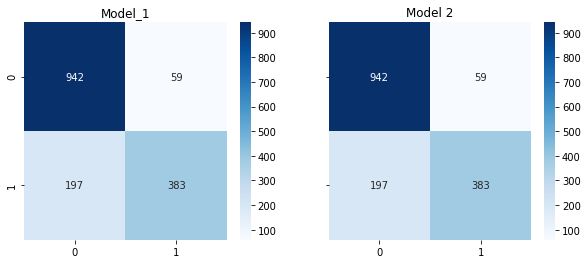

In [204]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Test['Scholarship'],model_1_test_class)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][0]);
a[0][0].set_title('Model_1')

plot_1 = sns.heatmap((metrics.confusion_matrix(Test['Scholarship'],model_2_test_class)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][1]);
a[0][1].set_title('Model 2');

### Classification Report For Train and Test Data

In [205]:
print('Model 1')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Scholarship'],model_1_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('Logit Regression Model 2')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Scholarship'],model_2_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

Model 1
True Negative: 942 
False Positives: 59 
False Negatives: 197 
True Positives: 383 


Logit Regression Model 2
True Negative: 942 
False Positives: 59 
False Negatives: 197 
True Positives: 383 




In [206]:
print("Classification Report for LR Train data Model1 \n",classification_report(Train['Scholarship'],model_1_train_class), "\n")
lr_train_metrices_model1=classification_report(Train['Scholarship'],model_1_train_class,output_dict=True)
lr_train_model1_df=pd.DataFrame(lr_train_metrices_model1).transpose()

print("Classification Report for LR Test data Model1 \n",classification_report(Test['Scholarship'],model_1_test_class), "\n \n \n")
lr_test_metrices_model1=classification_report(Test['Scholarship'],model_1_test_class,output_dict=True)
lr_test_model1_df=pd.DataFrame(lr_test_metrices_model1).transpose()

print("Classification Report for LR Train data Model2 \n",classification_report(Train['Scholarship'],model_2_train_class), "\n")
lr_train_metrices_model2=classification_report(Train['Scholarship'],model_2_train_class,output_dict=True)
lr_train_model2_df=pd.DataFrame(lr_train_metrices_model1).transpose()

print("Classification Report for LR Test data Model2 \n ",classification_report(Test['Scholarship'],model_2_test_class), "\n")
lr_test_metrices_model2=classification_report(Test['Scholarship'],model_2_test_class,output_dict=True)
lr_test_model2_df=pd.DataFrame(lr_test_metrices_model1).transpose()

Classification Report for LR Train data Model1 
               precision    recall  f1-score   support

           0       0.83      0.94      0.88      2336
           1       0.87      0.67      0.75      1351

    accuracy                           0.84      3687
   macro avg       0.85      0.80      0.82      3687
weighted avg       0.84      0.84      0.84      3687
 

Classification Report for LR Test data Model1 
               precision    recall  f1-score   support

           0       0.83      0.94      0.88      1001
           1       0.87      0.66      0.75       580

    accuracy                           0.84      1581
   macro avg       0.85      0.80      0.81      1581
weighted avg       0.84      0.84      0.83      1581
 
 
 

Classification Report for LR Train data Model2 
               precision    recall  f1-score   support

           0       0.83      0.94      0.88      2336
           1       0.87      0.67      0.75      1351

    accuracy                

### Roc Curve and ROC score for Train and Test Data

Logit ROC Score for Train data Model1 0.8172531065268751 

Logit ROC Curve for Train data Model1 


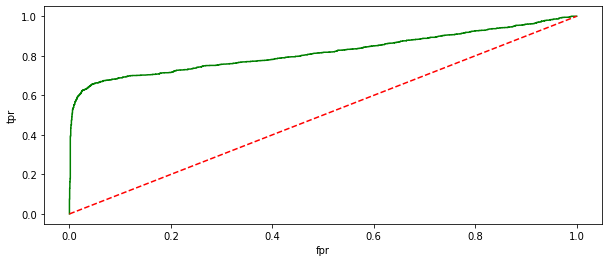

Logit ROC Score for Test data Model1 0.8129999311033793 

Logit ROC Curve for Test data Model1


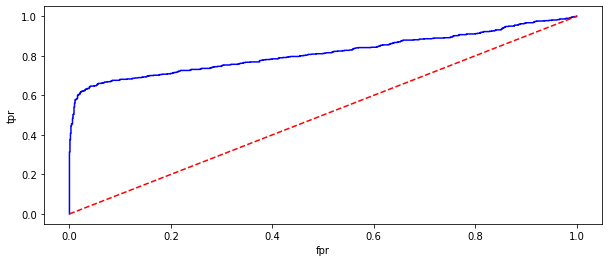

Logit ROC Score for Train data Model2  0.8172518390740496 

Logit ROC Curve for Train data Model2 


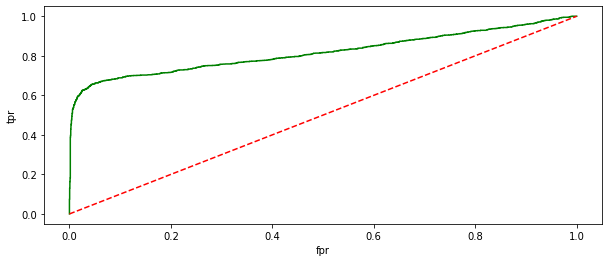

Logit ROC Score for Test data Model2  0.8130257673361122 

Logit ROC Curve for Test data Model2 


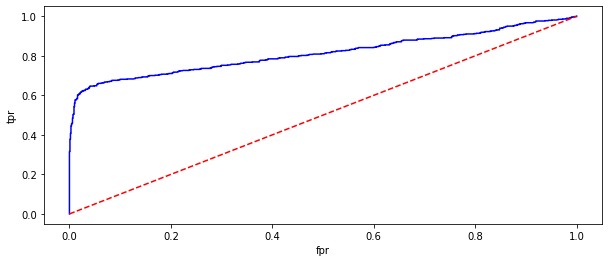

In [207]:
#Model1

roc_score_train1=metrics.roc_auc_score(Train['Scholarship'], model_1_train_proba[:,1])
print("Logit ROC Score for Train data Model1", roc_score_train1, "\n")
print("Logit ROC Curve for Train data Model1 ")
fpr,tpr,threshhold=metrics.roc_curve(Train['Scholarship'], model_1_train_proba[:,1])
plt.plot(fpr,tpr,c='g')
plt.plot([0, 1], [0, 1], linestyle='--', color = 'r')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()


roc_score_test1=metrics.roc_auc_score(Test['Scholarship'], model_1_test_proba[:,1])
print("Logit ROC Score for Test data Model1", roc_score_test1, "\n")
print("Logit ROC Curve for Test data Model1")
fpr,tpr,threshhold=metrics.roc_curve(Test['Scholarship'], model_1_test_proba[:,1])
plt.plot(fpr,tpr,c='b')
plt.plot([0, 1], [0, 1], linestyle='--', color = 'r')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

#Model2

roc_score_train2=metrics.roc_auc_score(Train['Scholarship'], model_2_train_proba[:,1])
print("Logit ROC Score for Train data Model2 ", roc_score_train2, "\n")
print("Logit ROC Curve for Train data Model2 ")
fpr,tpr,threshhold=metrics.roc_curve(Train['Scholarship'], model_2_train_proba[:,1])
plt.plot(fpr,tpr,c='g')
plt.plot([0, 1], [0, 1], linestyle='--', color = 'r')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

roc_score_test2=metrics.roc_auc_score(Test['Scholarship'], model_2_test_proba[:,1])
print("Logit ROC Score for Test data Model2 ", roc_score_test2, "\n")
print("Logit ROC Curve for Test data Model2 ")
fpr,tpr,threshhold=metrics.roc_curve(Test['Scholarship'], model_2_test_proba[:,1])
plt.plot(fpr,tpr,c='b')
plt.plot([0, 1], [0, 1], linestyle='--', color = 'r')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

Q4. Use the same training-test data split in Part (3) to develop a suitable linear discriminant model. Use the same to predict discriminant scores for the test data. Compare the final output from the logistic regression model and LDA.


##**Linear Discriminant Analysis**

In [208]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [209]:
LDA=LinearDiscriminantAnalysis()

### Model 1 - Building the LDA model on the Training Data and checking the Accuracy score on the training data.

In [210]:
model_1_LDA = LDA.fit(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low',
                             'Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_C','School_Type_D','Region_Southern',
                             'Region_Western']],Train['Scholarship'])

In [211]:
print('Accuracy Score of LDA Model 1:',model_1_LDA.score(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score',
                                                                'Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal',
                                                                'School_Type_C','School_Type_D','Region_Southern','Region_Western']],Train['Scholarship']))

Accuracy Score of LDA Model 1: 0.842690534309737


In [212]:
model_1_LDA_train_class = model_1_LDA.predict(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_C','School_Type_D','Region_Southern','Region_Western']])
model_1_LDA_train_proba = model_1_LDA.predict_proba(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_C','School_Type_D','Region_Southern','Region_Western']])

### Model 1 - Predicting the classes and the probabilities on the Test Data for the LDA model

In [213]:
model_1_LDA_test_class = model_1_LDA.predict(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_C','School_Type_D','Region_Southern','Region_Western']])
model_1_LDA_test_proba = model_1_LDA.predict_proba(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_C','School_Type_D','Region_Southern','Region_Western']])

### Model 2 - Building the LDA model on the Training Data and checking the Accuracy score on the training data.

In [214]:
model_2_LDA = LDA.fit(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low',
                             'Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_C','School_Type_D','Region_Southern']],
                      Train['Scholarship'])

In [215]:
print('Accuracy Score of LDA Model 2:',model_2_LDA.score(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score',
                                                                'Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate',
                                                                'Injury_Propensity_Normal','School_Type_C','School_Type_D','Region_Southern']]
                                                         ,Train['Scholarship']))

Accuracy Score of LDA Model 2: 0.8424193110930296


In [216]:
model_2_LDA_train_class = model_2_LDA.predict(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_C','School_Type_D','Region_Southern']])
model_2_LDA_train_proba = model_2_LDA.predict_proba(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_C','School_Type_D','Region_Southern']])

### Model 2 - Predicting the classes and the probabilities on the Test Data for the LDA model

In [217]:
model_2_LDA_test_class = model_2_LDA.predict(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_C','School_Type_D','Region_Southern']])
model_2_LDA_test_proba = model_2_LDA.predict_proba(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_C','School_Type_D','Region_Southern']])

In [218]:
### 
LDA.explained_variance_ratio_

array([1.])

## Confusion Matrix Summary Statistics evaluation on the Test Data

In [219]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,4

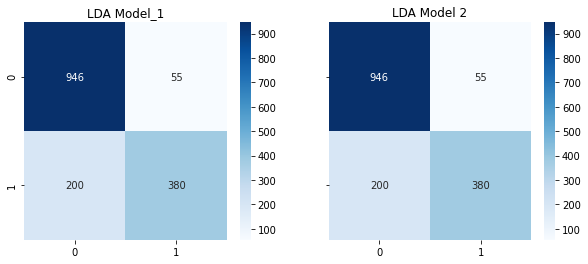

In [220]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Test['Scholarship'],model_1_LDA_test_class)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][0]);
a[0][0].set_title('LDA Model_1')

plot_1 = sns.heatmap((metrics.confusion_matrix(Test['Scholarship'],model_2_LDA_test_class)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][1]);
a[0][1].set_title('LDA Model 2');

In [221]:
print('LDA Model 1 Train')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Scholarship'],model_1_LDA_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('LDA Model 2 Train')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Scholarship'],model_2_LDA_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

LDA Model 1 Train
True Negative: 946 
False Positives: 55 
False Negatives: 200 
True Positives: 380 


LDA Model 2 Train
True Negative: 946 
False Positives: 55 
False Negatives: 200 
True Positives: 380 




### AUC-ROC summary statistics Evaluation on the Test Data. Calculate the AUC-ROC curves and the AUC values.

In [222]:
from sklearn.metrics import classification_report, roc_auc_score, auc, roc_curve

In [223]:
print("LDA Classification Report for Train data Model0 \n",classification_report(Train['Scholarship'],model_1_LDA_train_class), "\n")
lda_train_metrices_model1=classification_report(Train['Scholarship'],model_1_LDA_train_class,output_dict=True)
lda_train_model1_df=pd.DataFrame(lda_train_metrices_model1).transpose()


print("LDA Classification Report for Test data Model0 \n",classification_report(Test['Scholarship'],model_1_LDA_test_class), "\n \n \n")
lda_test_metrices_model1=classification_report(Test['Scholarship'],model_1_LDA_test_class,output_dict=True)
lda_test_model1_df=pd.DataFrame(lda_test_metrices_model1).transpose()

print("LDA Classification Report for Train data Model1 \n",classification_report(Train['Scholarship'],model_2_LDA_train_class), "\n")
lda_train_metrices_model2=classification_report(Train['Scholarship'],model_2_LDA_train_class,output_dict=True)
lda_train_model2_df=pd.DataFrame(lda_train_metrices_model2).transpose()

print("LDA Classification Report for Test data Model1 \n ",classification_report(Test['Scholarship'],model_2_LDA_test_class), "\n")
lda_test_metrices_model2=classification_report(Test['Scholarship'],model_2_LDA_test_class,output_dict=True)
lda_test_model2_df=pd.DataFrame(lda_test_metrices_model2).transpose()


LDA Classification Report for Train data Model0 
               precision    recall  f1-score   support

           0       0.83      0.95      0.88      2336
           1       0.88      0.66      0.76      1351

    accuracy                           0.84      3687
   macro avg       0.85      0.80      0.82      3687
weighted avg       0.85      0.84      0.84      3687
 

LDA Classification Report for Test data Model0 
               precision    recall  f1-score   support

           0       0.83      0.95      0.88      1001
           1       0.87      0.66      0.75       580

    accuracy                           0.84      1581
   macro avg       0.85      0.80      0.81      1581
weighted avg       0.84      0.84      0.83      1581
 
 
 

LDA Classification Report for Train data Model1 
               precision    recall  f1-score   support

           0       0.83      0.95      0.88      2336
           1       0.88      0.66      0.76      1351

    accuracy             

ROC Score for LDA Train Model1 0.8168589286981739 

ROC Curve for LDA Train Model1 


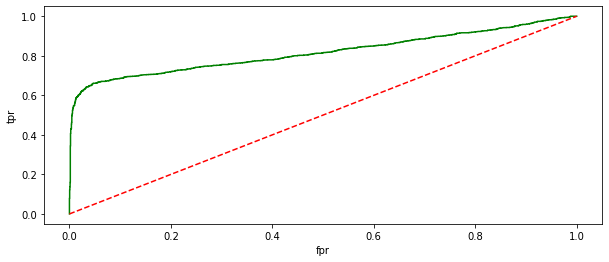

ROC Score for LDA Test data Model1 0.8112844052499224 

ROC Curve for LDA Test data Model1


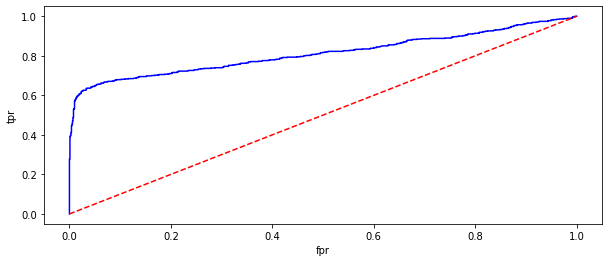

ROC Score for LDA Train data Model2  0.816896952282936 

ROC Curve for LDA Train data Model2 


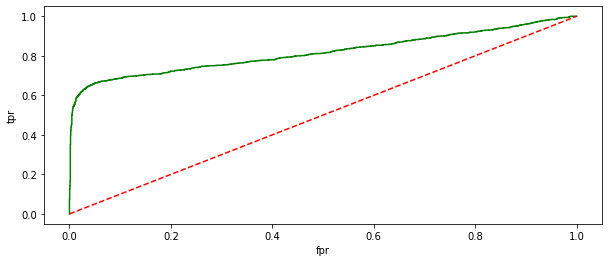

ROC Score for LDA Test data Model1  0.8113481346239967 

ROC Curve for LDA Test data Model1 


Text(0, 0.5, 'tpr')

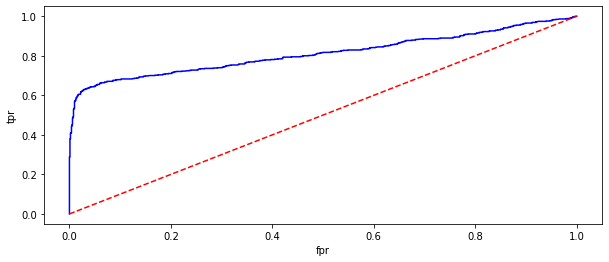

In [224]:
#Model1
lda_roc_score_train1=roc_auc_score(Train['Scholarship'],model_1_LDA_train_proba[:,1])
print("ROC Score for LDA Train Model1", lda_roc_score_train1, "\n")
print("ROC Curve for LDA Train Model1 ")
fpr,tpr,threshhold=roc_curve(Train['Scholarship'],model_1_LDA_train_proba[:,1])
plt.plot(fpr,tpr,c='g')
plt.plot([0, 1], [0, 1], linestyle='--', color = 'r')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

lda_roc_score_test1=roc_auc_score(Test['Scholarship'],model_1_LDA_test_proba[:,1])
print("ROC Score for LDA Test data Model1", lda_roc_score_test1, "\n")
print("ROC Curve for LDA Test data Model1")
fpr,tpr,threshhold=roc_curve(Test['Scholarship'],model_1_LDA_test_proba[:,1])
plt.plot(fpr,tpr,c='b')
plt.plot([0, 1], [0, 1], linestyle='--', color = 'r')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

#Model2

lda_roc_score_train2=roc_auc_score(Train['Scholarship'],model_2_LDA_train_proba[:,1])
print("ROC Score for LDA Train data Model2 ", lda_roc_score_train2, "\n")
print("ROC Curve for LDA Train data Model2 ")
fpr,tpr,threshhold=roc_curve(Train['Scholarship'],model_2_LDA_train_proba[:,1])
plt.plot(fpr,tpr,c='g')
plt.plot([0, 1], [0, 1], linestyle='--', color = 'r')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

lda_roc_score_test2=roc_auc_score(Test['Scholarship'],model_2_LDA_test_proba[:,1])
print("ROC Score for LDA Test data Model1 ", lda_roc_score_test2, "\n")
print("ROC Curve for LDA Test data Model1 ")
fpr,tpr,threshhold=roc_curve(Test['Scholarship'],model_2_LDA_test_proba[:,1])
plt.plot(fpr,tpr,c='b')
plt.plot([0, 1], [0, 1], linestyle='--', color = 'r')
plt.xlabel("fpr")
plt.ylabel("tpr")

In [225]:
print("\n Linear Regression Train Model 1 \n",lr_train_model1_df.head())
print("\n\n")
print("\n Linear Regression Test Model 1 \n",lr_test_model1_df.head())
print("\n\n")
print("\n Linear Regression Train Model 2 \n",lr_train_model2_df.head())
print("\n\n")
print("\n Linear Regression Test Model 2  \n",lr_test_model2_df.head())
print("\n\n")
print("\n\n")
print("\n LDA Train Model 1 \n",lda_train_model1_df.head())
print("\n\n")
print("\n LDA Test Model 1  \n",lda_test_model1_df.head())
print("\n\n")
print("\n LDA Train Model 2 \n",lda_train_model2_df.head())
print("\n\n")
print("\n LDA Test Model 2  \n",lda_test_model2_df.head())


 Linear Regression Train Model 1 
               precision    recall  f1-score      support
0              0.829876  0.941781  0.882294  2336.000000
1              0.868726  0.666173  0.754085  1351.000000
accuracy       0.840792  0.840792  0.840792     0.840792
macro avg      0.849301  0.803977  0.818189  3687.000000
weighted avg   0.844111  0.840792  0.835315  3687.000000




 Linear Regression Test Model 1 
               precision    recall  f1-score      support
0              0.827041  0.941059  0.880374  1001.000000
1              0.866516  0.660345  0.749511   580.000000
accuracy       0.838077  0.838077  0.838077     0.838077
macro avg      0.846779  0.800702  0.814942  1581.000000
weighted avg   0.841523  0.838077  0.832366  1581.000000




 Linear Regression Train Model 2 
               precision    recall  f1-score      support
0              0.829876  0.941781  0.882294  2336.000000
1              0.868726  0.666173  0.754085  1351.000000
accuracy       0.840792  0.84079

In [226]:
### LR Model1

lr_train_model1_precision=round(lr_train_model1_df["precision"][0],4)
lr_train_model1_recall=round(lr_train_model1_df["recall"][0],4)
lr_train_model1_f1=round(lr_train_model1_df["f1-score"][0],4)
lr_train_model1_acc=round(lr_train_model1_df["f1-score"][2],4)
lr_train_model1_auc=round(roc_score_train1,4)

lr_test_model1_precision=round(lr_test_model1_df["precision"][0],4)
lr_test_model1_recall=round(lr_test_model1_df["recall"][0],4)
lr_test_model1_f1=round(lr_test_model1_df["f1-score"][0],4)
lr_test_model1_acc=round(lr_test_model1_df["f1-score"][2],4)
lr_test_model1_auc=round(roc_score_test1,4)

### LR Model2

lr_train_model2_precision=round(lr_train_model2_df["precision"][0],4)
lr_train_model2_recall=round(lr_train_model2_df["recall"][0],4)
lr_train_model2_f1=round(lr_train_model2_df["f1-score"][0],4)
lr_train_model2_acc=round(lr_train_model2_df["f1-score"][2],4)
lr_train_model2_auc=round(roc_score_train2,2)

lr_test_model2_precision=round(lr_test_model2_df["precision"][0],4)
lr_test_model2_recall=round(lr_test_model2_df["recall"][0],4)
lr_test_model2_f1=round(lr_test_model2_df["f1-score"][0],4)
lr_test_model2_acc=round(lr_test_model2_df["f1-score"][2],4)
lr_test_model2_auc=round(roc_score_test2,4)


### LDA Model1
lda_train_model1_precision=round(lda_train_model1_df["precision"][0],4)
lda_train_model1_recall=round(lda_train_model1_df["recall"][0],4)
lda_train_model1_f1=round(lda_train_model1_df["f1-score"][0],4)
lda_train_model1_acc=round(lda_train_model1_df["f1-score"][2],4)
lda_train_model1_auc=round(lda_roc_score_train1,4)

lda_test_model1_precision=round(lda_test_model1_df["precision"][0],4)
lda_test_model1_recall=round(lda_test_model1_df["recall"][0],4)
lda_test_model1_f1=round(lda_test_model1_df["f1-score"][0],4)
lda_test_model1_acc=round(lda_test_model1_df["f1-score"][2],4)
lda_test_model1_auc=round(lda_roc_score_test1,4)


### LDA Model2
lda_train_model2_precision=round(lda_train_model2_df["precision"][0],4)
lda_train_model2_recall=round(lda_train_model2_df["recall"][0],4)
lda_train_model2_f1=round(lda_train_model2_df["f1-score"][0],4)
lda_train_model2_acc=round(lda_train_model2_df["f1-score"][2],4)
lda_train_model2_auc=round(lda_roc_score_train2,4)

lda_test_model2_precision=round(lda_test_model2_df["precision"][0],4)
lda_test_model2_recall=round(lda_test_model2_df["recall"][0],4)
lda_test_model2_f1=round(lda_test_model2_df["f1-score"][0],4)
lda_test_model2_acc=round(lda_test_model2_df["f1-score"][2],4)
lda_test_model2_auc=round(lda_roc_score_test2,4)

In [227]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train1':[lr_train_model1_acc,lr_train_model1_auc,lr_train_model1_recall,lr_train_model1_precision,lr_train_model1_f1],
            'LR Test1':[lr_test_model1_acc,lr_test_model1_auc,lr_test_model1_recall,lr_test_model1_precision,lr_test_model1_f1],
            'LR Train2':[lr_train_model2_acc,lr_train_model2_auc,lr_train_model2_recall,lr_train_model2_precision,lr_train_model2_f1],
            'LR Test2':[lr_test_model1_acc,lr_test_model2_auc,lr_test_model2_recall,lr_test_model2_precision,lr_test_model2_f1],
            
            'LDA Train1':[lda_train_model1_acc,lda_train_model1_auc,lda_train_model1_recall,lda_train_model1_precision,lda_train_model1_f1],
            'LDA Test1':[lda_test_model1_acc,lda_test_model1_auc,lda_test_model1_recall,lda_test_model1_precision,lda_test_model1_f1],
            'LDA Train2':[lda_train_model2_acc,lda_train_model2_auc,lda_train_model2_recall,lda_train_model2_precision,lda_train_model2_f1],
            'LDA Test2':[lda_test_model2_acc,lda_test_model2_auc,lda_test_model2_recall,lda_test_model2_precision,lda_test_model2_f1]},index=index)
round(data,3)

,LR Train1,LR Test1,LR Train2,LR Test2,LDA Train1,LDA Test1,LDA Train2,LDA Test2
Accuracy,0.841,0.838,0.841,0.838,0.843,0.839,0.842,0.839
AUC,0.817,0.813,0.820,0.813,0.817,0.811,0.817,0.811
Recall,0.942,0.941,0.942,0.941,0.946,0.945,0.946,0.945
Precision,0.830,0.827,0.830,0.827,0.829,0.826,0.829,0.826
F1 Score,0.882,0.880,0.882,0.880,0.884,0.881,0.884,0.881


Observation: While the LDA Model 2 performs exactly the same as LDA Model 1, both perform slightly better than the Linear Regression Models. For predictive power, LDA Model 2 is better, however, for explainablity, Logistic Regression Model 2 is better. Although the two Logistic Regression Models offer the same performance, the second model only has significant variables, so that is most preferable.
